In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import plotly.express as px
# import squarify
# import plotly.graph_objects as go

# Load datasets

In [2]:
consequence= pd.read_csv('../db_tables/consequence.tsv', sep='\t')
mutations = pd.read_csv('../db_tables/mutation_new.tsv.gz', sep='\t', compression='gzip').merge(consequence)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [205]:
# Traer los nombres de las prote
proteins = pd.read_csv('../db_tables/protein.tsv', sep='\t', usecols=['id_protein', 'uniprot_acc', 'uniprot_name'])
prot_mutation = mutations.merge(proteins)[
    ['id_mutation',	'snp_id', 'start_aa', 'end_aa',	'consequence', 'uniprot_acc', 'uniprot_name']
]
prot_mutation.uniprot_name = prot_mutation.uniprot_name.str.split("_").str[0] # delete "_HUMAN"
# Group
prot = prot_mutation.groupby('uniprot_name')['id_mutation'].count().sort_values(ascending= False)

In [206]:
proteins.uniprot_name = proteins.uniprot_name.str.split("_").str[0] # delete "_HUMAN"
proteins

,id_protein,uniprot_acc,uniprot_name
0,1,P35637,FUS
1,2,Q06787,FMR1
2,3,Q92804,RBP56
3,4,Q13148,TADBP
4,5,Q01844,EWS
...,...,...,...
5736,5737,Q9Y6R4,M3K4
5737,5738,Q9Y6S9,RPKL1
5738,5739,Q9Y6U7,RN215
5739,5740,Q9Y6W6,DUS10


# Proteins

In [207]:
prot_others = pd.Series({'others': prot[10:].sum()})
prot_topten = prot
# prot_topten = prot[:1000]
prot_topten_others= pd.concat([prot_others, prot_topten])

In [208]:
prot_topten

uniprot_name
TITIN     20552
BRCA2     12063
APC        9237
BRCA1      9177
ATM        8472
          ...  
SAC31         1
F8VZ45        1
B4DW05        1
IGHM          1
H0YN14        1
Name: id_mutation, Length: 5579, dtype: int64

In [204]:
len(prot_topten)

5579

In [23]:
np.linspace(1, 1000, 6, dtype=int)

array([   1,  200,  400,  600,  800, 1000])

In [24]:
np.arange(0, 1001, 200, dtype=int)

array([   0,  200,  400,  600,  800, 1000])

## Distribution by protein

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


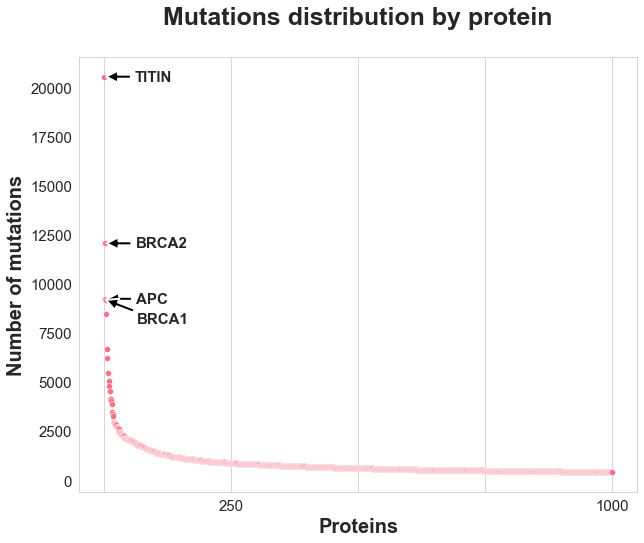

In [110]:
# PLOT top ten mutations in LLPS proteins
from matplotlib.ticker import MaxNLocator
sns.set_style("whitegrid")
sns.set_palette("husl", 10)

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x= range(1000), y= prot_topten[:1000])#.set(xticklabels=[])

#ax.locator_params(axis="x", nbins=10)
#ax.set(xticklabels=np.linspace(1, 1000, 6, dtype=int))
ax.set(xticklabels=['',  '',250, '', '', 1000])
#ax.tick_params(bottom=False)
ax.tick_params(labelsize=15)
#ax.set_xticklabels(np.linspace(1, 1000, 7, dtype=int))
ax.xaxis.set_major_locator(MaxNLocator(5))

# Anotate proteins name. text(x, y, s)
#for i in range(4):
#    ax.text(prot_topten.index[i], prot_topten[i], prot_topten.index[i], size=15)

for i in range(3):
    x = i
    y = prot_topten[i]
    ax.annotate(
        prot_topten.index[i],
        xy= (x, y),
        xytext = (x+60, y),
        size=15,
        weight='bold',
        arrowprops = dict(facecolor='black', shrink=0.05, linewidth= 2),
        va= 'center',
        verticalalignment='bottom'
        )

# BRCA1
x = 3
y = prot_topten[3]
ax.annotate(
    prot_topten.index[3],
    xy= (x, y),
    xytext = (x+60, y-600),
    size=15,
    weight='bold',
    arrowprops = dict(facecolor='black', shrinkA=0, linewidth= 2),
    verticalalignment='top',
    horizontalalignment='left'
    )

ax.grid(axis="y")
ax.set_title("Mutations distribution by protein\n", fontsize=25, weight='bold')
ax.set_ylabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_xlabel ("Proteins", fontsize=20, weight='bold')
plt.show()
#bar.savefig("mutations_proteins_b.png", dpi= 300)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



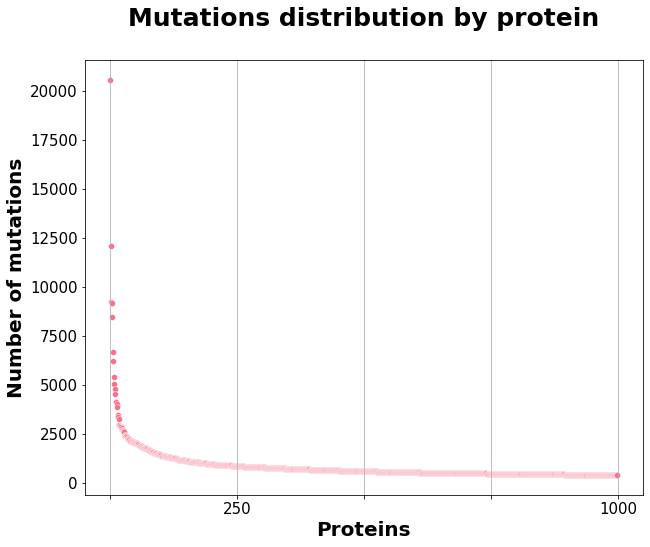

In [25]:
# PLOT top ten mutations in LLPS proteins
from matplotlib.ticker import MaxNLocator
#sns.set_style("whitegrid")
sns.set_palette("husl", 10)

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x= prot_topten.index[:1000], y= prot_topten[:1000])#.set(xticklabels=[])

#ax.locator_params(axis="x", nbins=10)
#ax.set(xticklabels=np.linspace(1, 1000, 6, dtype=int))
ax.set(xticklabels=['',  '',250, '', '', 1000])
#ax.tick_params(bottom=False)
ax.tick_params(labelsize=15)
#ax.set_xticklabels(np.linspace(1, 1000, 7, dtype=int))
ax.xaxis.set_major_locator(MaxNLocator(5))

ax.grid(axis="x")
ax.set_title("Mutations distribution by protein\n", fontsize=25, weight='bold')
ax.set_ylabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_xlabel ("Proteins", fontsize=20, weight='bold')
plt.show()

## As histogram

In [26]:
prot_topten

uniprot_name
TITIN    20552
BRCA2    12063
APC       9237
BRCA1     9177
ATM       8472
         ...  
ELYS         1
TPTE         1
CT451        1
HAUS7        1
NCOA4        1
Name: id_mutation, Length: 5402, dtype: int64

In [92]:
np.log(prot_topten)

uniprot_name
TITIN     9.930714
BRCA2     9.397898
APC       9.130972
BRCA1     9.124456
ATM       9.044522
            ...   
SAC31     0.000000
F8VZ45    0.000000
B4DW05    0.000000
IGHM      0.000000
H0YN14    0.000000
Name: id_mutation, Length: 5579, dtype: float64

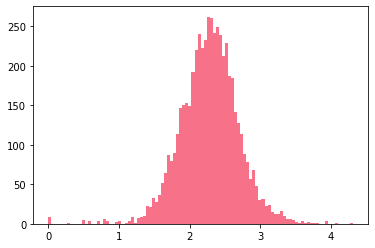

In [30]:
#from math import log10
fig, ax = plt.subplots()
plt.hist(np.log10(prot_topten), bins= 100)
#plt.xticks(prot_topten)
#plt.locator_params(axis='x', nbins=20)
#plt.xticks(np.arange(min(prot_topten), max(prot_topten)+1, 500))
plt.show()

In [29]:
np.linspace(min(prot_topten), max(prot_topten), 10, dtype=int)

array([    1,  2284,  4567,  6851,  9134, 11418, 13701, 15985, 18268,
       20552])

In [111]:
[f"{n:.1E}" for n in [0, 1, 2, 3, 4, 5 ]]

['0.0E+00', '1.0E+00', '2.0E+00', '3.0E+00', '4.0E+00', '5.0E+00']

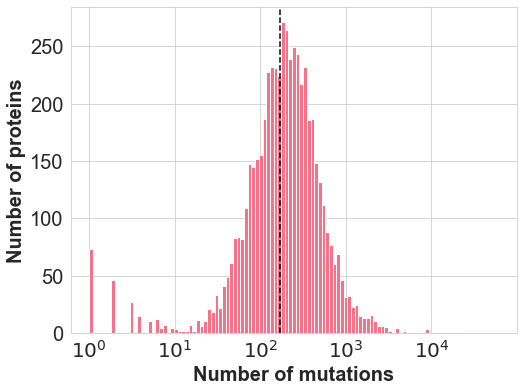

In [94]:
# Este es el que vaaaaaaaaa
sns.set_palette("husl", 10)
top_log = np.log10(prot_topten)
fig, ax = plt.subplots(figsize=(8,6))
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
n, bins, patches = ax.hist(top_log, bins= 100) #, edgecolor='gray'

labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'

bin_max = np.where(n == n.max())
a = bins[bin_max][0]
ax.set_xticks([0, 1, 2, 3, 4, 5])
#ax.set_xticklabels(np.logspace(min(top_log), max(top_log), 7, dtype=int)) # no es lineal
from matplotlib.ticker import ScalarFormatter
ax.set_xticklabels([f"$10^{n}$" for n in [0, 1, 2, 3, 4 ]] + [""])

#ax.xaxis.set_major_formatter(ScalarFormatter())
#ax.ticklabel_format(axis="x",style="plain", scilimits=(0,5))
#plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

# mean value
plt.axvline(top_log.mean(), color='k', linestyle='dashed', linewidth=1.5)



#plt.xticks(rotation=30)
ax.tick_params(labelsize=20)
#ax.grid(axis='y')
plt.xlabel("Number of mutations", fontsize=20, weight='bold')
plt.ylabel("Number of proteins", fontsize=20, weight='bold')


plt.show()

In [130]:
round(10 ** top_log.mean())

192

In [76]:
np.linspace(min(top_log), max(top_log))

array([0.        , 0.08801743, 0.17603486, 0.26405229, 0.35206972,
       0.44008715, 0.52810458, 0.61612201, 0.70413944, 0.79215687,
       0.8801743 , 0.96819173, 1.05620917, 1.1442266 , 1.23224403,
       1.32026146, 1.40827889, 1.49629632, 1.58431375, 1.67233118,
       1.76034861, 1.84836604, 1.93638347, 2.0244009 , 2.11241833,
       2.20043576, 2.28845319, 2.37647062, 2.46448805, 2.55250548,
       2.64052291, 2.72854034, 2.81655777, 2.9045752 , 2.99259263,
       3.08061007, 3.1686275 , 3.25664493, 3.34466236, 3.43267979,
       3.52069722, 3.60871465, 3.69673208, 3.78474951, 3.87276694,
       3.96078437, 4.0488018 , 4.13681923, 4.22483666, 4.31285409])

In [59]:
n

array([  9.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         5.,   0.,   3.,   0.,   0.,   3.,   0.,   6.,   4.,   0.,   0.,
         2.,   3.,   0.,   1.,   3.,   8.,   1.,   7.,   9.,  10.,  23.,
        21.,  33.,  28.,  36.,  52.,  64.,  87.,  79.,  90., 114., 146.,
       150., 153., 149., 192., 220., 240., 223., 232., 262., 261., 241.,
       249., 239., 212., 229., 187., 184., 141., 128., 114.,  88.,  78.,
        57.,  68.,  48.,  30.,  31.,  22.,  24.,  15.,  13.,  13.,  16.,
        10.,   6.,   6.,   5.,   2.,   1.,   4.,   1.,   2.,   1.,   1.,
         1.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         1.])

In [64]:
bin_max = np.where(n == n.max())

10 ** bins[bin_max][0]

174.85744468770682

304.89300259163275 534.0770314124368


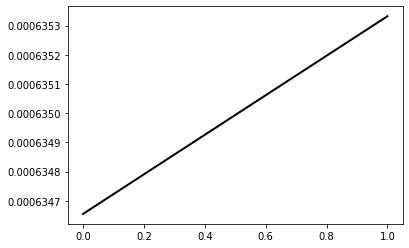

In [120]:

from scipy.stats import norm
  
# Generate some data for this 
# demonstration.
data = np.random.normal(170, 10, 250)
  
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(prot_topten)
print(mu, std)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)

<AxesSubplot:xlabel='id_mutation', ylabel='Count'>

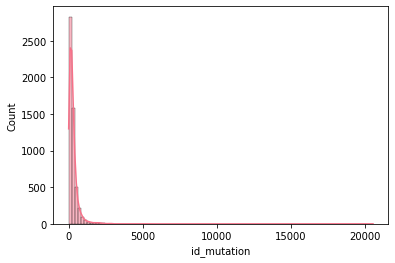

In [43]:
sns.histplot(data= prot_topten, bins=100, kde= True)

In [82]:
prot_mutation

,id_mutation,snp_id,start_aa,end_aa,consequence,uniprot_acc,uniprot_name
0,1,rs184639841,442,442,synonym,Q9ULP9,TBC24
1,2,rs12373107,480,480,synonym,Q9ULP9,TBC24
2,3,rs201059992,500,500,synonym,Q9ULP9,TBC24
3,4,rs189089167,503,503,synonym,Q9ULP9,TBC24
4,5,rs13339237,69,69,synonym,Q9ULP9,TBC24
...,...,...,...,...,...,...,...
1647027,1549229,NaN,3,3,missense,Q9NPJ4,PNRC2
1647028,1549230,NaN,44,44,missense,Q9NPJ4,PNRC2
1647029,1549231,NaN,93,93,missense,Q9NPJ4,PNRC2
1647030,1549232,NaN,37,37,missense,Q9NPJ4,PNRC2


# Mutaciones por chr

In [30]:
mutations_chr = mutations[['id_mutation', 'chromosome']].groupby('chromosome').count().sort_values('id_mutation', ascending= False)
mutations_chr

,id_mutation
chromosome,
1,148491
2,136949
17,105585
12,95395
19,94439
11,90687
3,87799
5,87079
6,85702


In [31]:
mutations_chr.sum()

id_mutation    1647032
dtype: int64

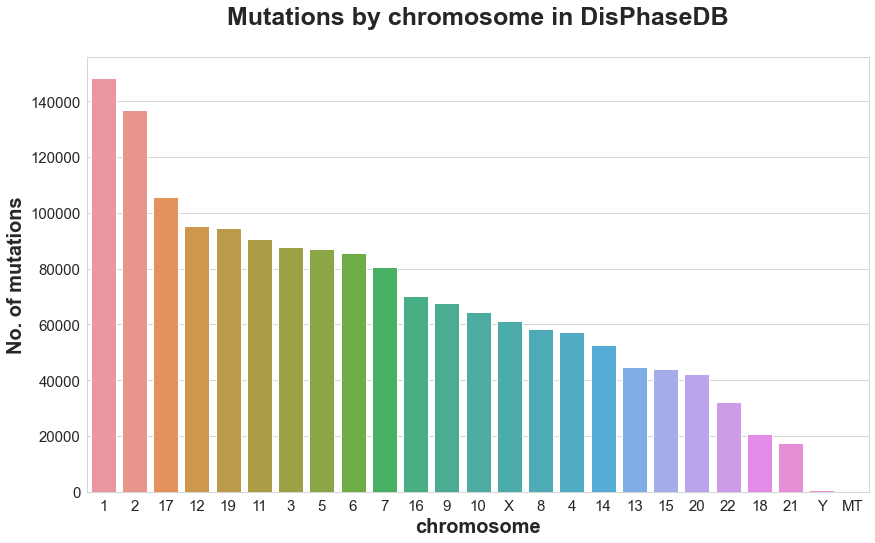

In [26]:
sns.set_style("whitegrid")
#sns.set_palette('turbo', 10)

bar,ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x= mutations_chr.index, y= 'id_mutation', data= mutations_chr)

ax.set_title("Mutations by chromosome in DisPhaseDB\n", fontsize=25, weight='bold')
ax.set_xlabel ("chromosome", fontsize=20, weight='bold')
ax.set_ylabel ("No. of mutations", fontsize=20, weight='bold')
ax.tick_params(labelsize=15)

plt.show()

# Mutations plots

## Mutations donnut

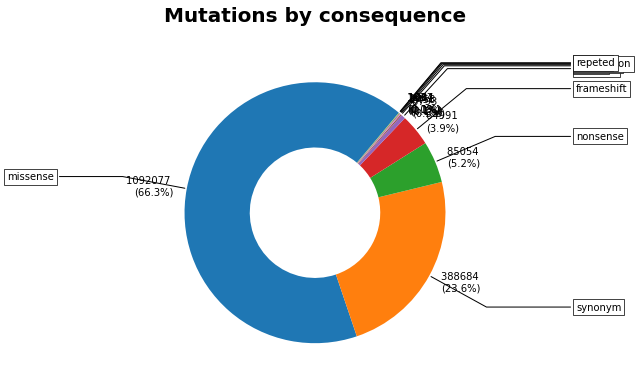

In [7]:
# %% Mutations by consequence Donut
#plt.style.use('seaborn-pastel')
cq = mutations.consequence.value_counts()
labels = cq.index
sizes = cq
pcts = [f'{s} \n({s*100/sum(sizes):.1f}%)' for s in sizes]
#width = 0.35

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle= 50, labels= pcts) #, rotatelabels=True

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(cq.index[i], xy=(x, y), xytext=(2*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Mutations by consequence\n", fontsize=20, weight= 'bold')

plt.show()

## Mutations Treemap

In [8]:
labels

Index(['missense', 'synonym', 'nonsense', 'frameshift', 'deletion', 'delins',
       'insertion', 'duplication', 'nostop', 'repeted'],
      dtype='object')

In [9]:
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [10]:
fig = px.treemap(
    data_frame = consequence,
    #names = consequence.consequence.tolist(),
    path= ['consequence'],
    values= sizes.tolist(),
    #parents = consequence.consequence.tolist()
    title= "Mutations by consequence in DisPhaseDB",
    #texttemplate = "%{path}: %{values:$,s} <br>(%{percent})",
   # textposition = "inside"
   width=1500, #px
   height= 1000 #px
)
fig.update_traces(root_color="lightgrey")
#fig.add_trace(go.treemap(textinfo = 'percent entry')) # no va

fig.show()

In [11]:
percents = (
    (sizes/sum(sizes))*100
).tolist()
percents

[66.30575483657877,
 23.599055756050884,
 5.164076957824742,
 3.9459464054128883,
 0.5338694087303707,
 0.14923814473549998,
 0.12391987526654007,
 0.10710174422840602,
 0.06114028142744039,
 0.009896589744461552]

In [12]:
# fig.data[0].customdata = np.column_stack([sizes, percents])
fig.data[0].customdata = [x[1] for x in np.column_stack([sizes, percents])]
fig.data[0].values = [x[0] for x in np.column_stack([sizes, percents])]


In [13]:
fig.data[0].labels = consequence.consequence.tolist()

In [14]:
fig.data[0].customdata

(66.30575483657877,
 23.599055756050884,
 5.164076957824742,
 3.9459464054128883,
 0.5338694087303707,
 0.14923814473549998,
 0.12391987526654007,
 0.10710174422840602,
 0.06114028142744039,
 0.009896589744461552)

In [15]:
fig.data[0].values

(1092077.0,
 388684.0,
 85054.0,
 64991.0,
 8793.0,
 2458.0,
 2041.0,
 1764.0,
 1007.0,
 163.0)

In [16]:
fig.data

(Treemap({
     'branchvalues': 'total',
     'customdata': [66.30575483657877, 23.599055756050884, 5.164076957824742,
                    3.9459464054128883, 0.5338694087303707, 0.14923814473549998,
                    0.12391987526654007, 0.10710174422840602, 0.06114028142744039,
                    0.009896589744461552],
     'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
     'hovertemplate': 'labels=%{label}<br>value=%{value}<br>parent=%{parent}<br>id=%{id}<extra></extra>',
     'ids': array(['deletion', 'delins', 'duplication', 'frameshift', 'insertion',
                   'missense', 'nonsense', 'nostop', 'repeted', 'synonym'], dtype=object),
     'labels': [missense, synonym, nonsense, frameshift, deletion, delins,
                insertion, duplication, nostop, repeted],
     'name': '',
     'parents': array(['', '', '', '', '', '', '', '', '', ''], dtype=object),
     'root': {'color': 'lightgrey'},
     'values': [1092077.0, 388684.0, 85054.0, 64991.0, 8793.0, 2458.0, 2041.0

In [17]:

# fig.data[0].texttemplate = "%{label}<br>%{value}<br>Count:%{customdata[0]}<br>Percent of total:%{customdata[1]:.2f}%"
fig.data[0].texttemplate = "%{label}<br>%{value} (%{customdata:.1f}%)<br>"
fig.show()

In [18]:
#fig.data[0].customdata = list(range(10))

In [19]:
# import kaleido
# import plotly.graph_objects as go

In [20]:
fig.write_image("mutations_consequence.png")

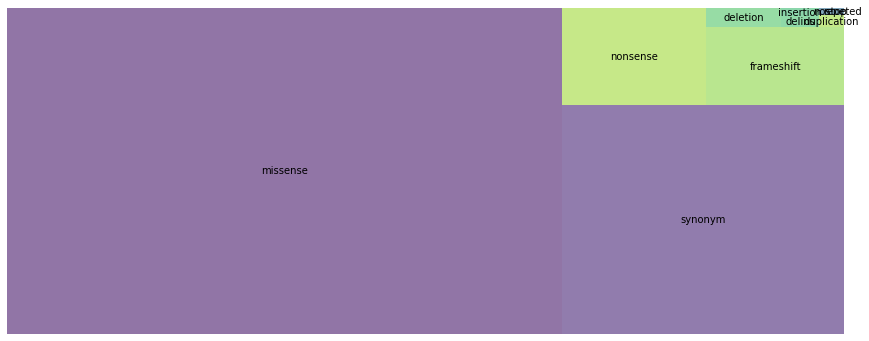

In [21]:
plt.subplots(figsize= (15,6))
squarify.plot(sizes, label= consequence.consequence.tolist(), alpha=0.6 )
plt.axis('off')
plt.show()

## Mutations by type - barplot

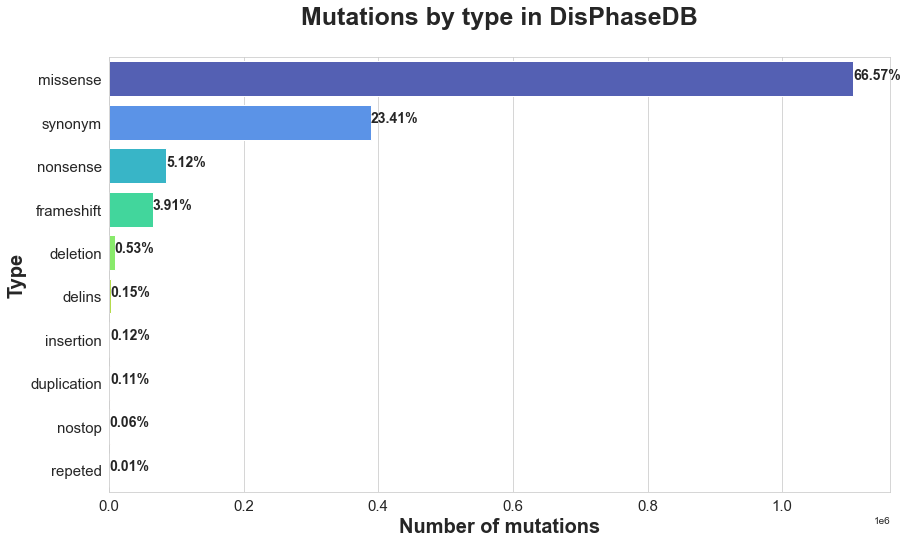

In [114]:
# Top ten diseases barra
sns.set_style("whitegrid")
#sns.set_palette('turbo', 10)

cq = mutations.consequence.value_counts() # series with mutations types frequency
bar,ax = plt.subplots(figsize=(14,8))

ax = sns.barplot(x= cq, y= cq.index, palette= "turbo", orient='h') 
ax.set_title("Mutations by type in DisPhaseDB\n", fontsize=25, weight='bold')
ax.set_xlabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_ylabel ("Type", fontsize=20, weight='bold')
ax.tick_params(labelsize=15)

for i, v in enumerate(cq):
    ax.text(v, i, f'{v/sum(cq)*100:.2f}%', weight='bold', fontsize=14)

plt.show()
#bar.savefig("mutations_type.png", dpi= 300)

In [110]:
# Agrupar las ultimas 5 en "others"
others = mutations.consequence.value_counts()[-5:].sum()
others = pd.Series({"others": others})

In [112]:
cq1 = mutations.consequence.value_counts()[:5].append(others)
cq1

missense      1105104
synonym        388684
nonsense        85054
frameshift      64991
deletion         8793
others           7433
dtype: int64

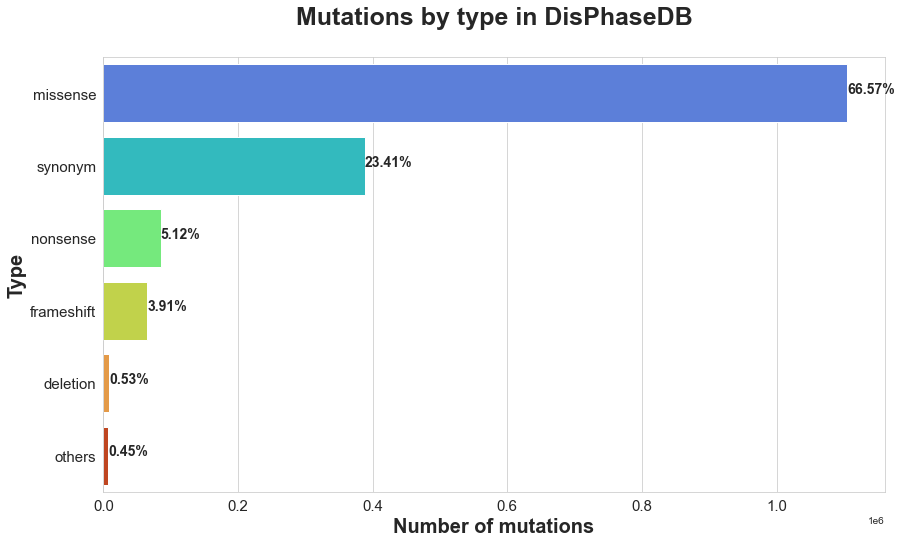

In [116]:
# Top ten diseases barra (including OTHERS)
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(14,8))

ax = sns.barplot(x= cq1, y= cq1.index, palette= "turbo", orient='h') 
ax.set_title("Mutations by type in DisPhaseDB\n", fontsize=25, weight='bold')
ax.set_xlabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_ylabel ("Type", fontsize=20, weight='bold')
ax.tick_params(labelsize=15)

for i, v in enumerate(cq1):
    ax.text(v, i, f'{v/sum(cq)*100:.2f}%', weight='bold', fontsize=14)

plt.show()
#bar.savefig("mutations_type_others.png", dpi= 300)

In [138]:
'''# Top ten diseases barra (incluyendo others)
#from brokenaxes import brokenaxes
sns.set_style("whitegrid")
#sns.set_palette('turbo', 10)

cq = mutations.consequence.value_counts() # series with mutations types frequency

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,8))

sns.barplot(x= cq, y= cq.index, palette= 'turbo',  orient='h', ax=ax1)
sns.barplot(x= cq, y= cq.index, palette= 'turbo',  orient='h', ax=ax2)

#baxes = brokenaxes(xlims= (500_000, 1_000_000))

# zoom-in / limit the view to different portions of the data
ax1.set_xlim(0, 500_000) # most of the data
ax2.set_xlim(1_200_000, 1_700_000) # outliers only

# Make the spacing between the two axes a bit smaller
plt.subplots_adjust(wspace=0.1)

ax = ax1
ax = sns.barplot(x= cq, y= cq.index, palette= "turbo", orient='h') 
ax.set_title("Mutations by type in DisPhaseDB\n", fontsize=25, weight='bold')
ax.set_xlabel ("Number of mutations (log)", fontsize=20, weight='bold')
ax.set_ylabel ("Consequence", fontsize=20, weight='bold')
ax.tick_params(labelsize=15)

ax2.set(ylabel= None, xlabel= None)
ax2.set(xticklabels=[1_200_000, '', '', '', '', '', 1_700_000])

for i, v in enumerate(cq):
    ax1.text(v, i, f'{v/sum(cq)*100:.2f}%', weight='bold', fontsize=14)

plt.show()
#bar.savefig("mutations_type.png", dpi= 300)'''

'# Top ten diseases barra (incluyendo others)\n#from brokenaxes import brokenaxes\nsns.set_style("whitegrid")\n#sns.set_palette(\'turbo\', 10)\n\ncq = mutations.consequence.value_counts() # series with mutations types frequency\n\nf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,8))\n\nsns.barplot(x= cq, y= cq.index, palette= \'turbo\',  orient=\'h\', ax=ax1)\nsns.barplot(x= cq, y= cq.index, palette= \'turbo\',  orient=\'h\', ax=ax2)\n\n#baxes = brokenaxes(xlims= (500_000, 1_000_000))\n\n# zoom-in / limit the view to different portions of the data\nax1.set_xlim(0, 500_000) # most of the data\nax2.set_xlim(1_200_000, 1_700_000) # outliers only\n\n# Make the spacing between the two axes a bit smaller\nplt.subplots_adjust(wspace=0.1)\n\nax = ax1\nax = sns.barplot(x= cq, y= cq.index, palette= "turbo", orient=\'h\') \nax.set_title("Mutations by type in DisPhaseDB\n", fontsize=25, weight=\'bold\')\nax.set_xlabel ("Number of mutations (log)", fontsize=20, weight=\'bold\')\nax.set_y

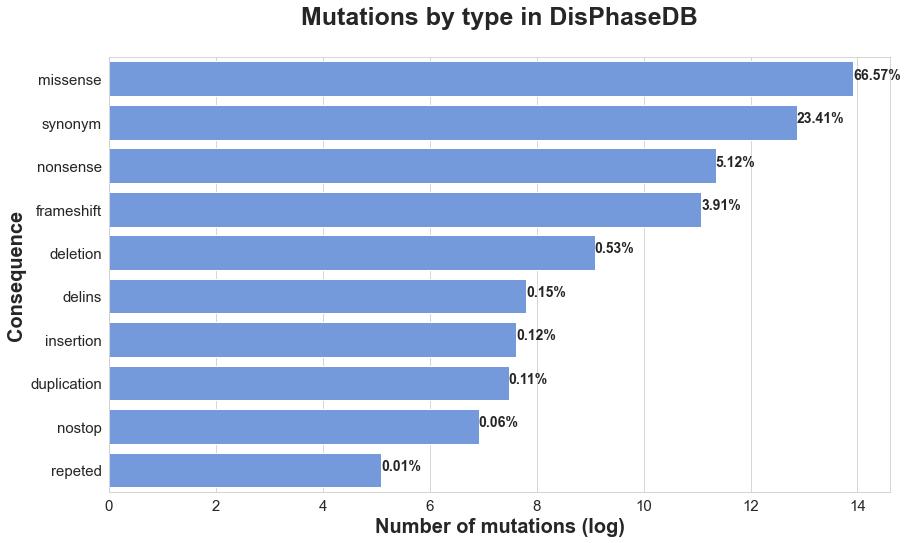

In [34]:
# Top ten diseases barra (log)
# Horizontal barplot
sns.set_style("whitegrid")
#sns.set_palette('turbo', 10)

cq = mutations.consequence.value_counts() # series with mutations types frequency
cq = np.log(cq)

bar,ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x= cq, y= cq.index, color= "cornflowerblue" , orient='h') # palette= "turbo"
ax.set_title("Mutations by type in DisPhaseDB\n", fontsize=25, weight='bold')
ax.set_xlabel ("Number of mutations (log)", fontsize=20, weight='bold')
ax.set_ylabel ("Consequence", fontsize=20, weight='bold')
ax.tick_params(labelsize=15)
for i, v in enumerate(cq):
    ax.text(v, i, f'{np.exp(v)/sum(np.exp(cq))*100:.2f}%', weight='bold', fontsize=14)

plt.show()
#bar.savefig("mutations_type_log.png", dpi= 300)

In [27]:
for i, v in enumerate(cq):
    print(i, np.exp(v))

0 1105103.9999999995
1 388683.9999999997
2 85054.00000000007
3 64990.99999999999
4 8792.999999999995
5 2457.999999999999
6 2041.0000000000002
7 1764.0000000000005
8 1007.0000000000003
9 163.0


## Hacer lo mismo, pero cada barra por el rol (esto NO VA)

In [42]:
# Para eso hay que asociar las mutaciones al rol en la proteina
mutations_roles = mutations[['id_mutation', 'id_protein', 'consequence']]
mutations_roles

,id_mutation,id_protein,consequence
0,1,3155,synonym
1,2,3155,synonym
2,3,3155,synonym
3,4,3155,synonym
4,5,3155,synonym
...,...,...,...
1660054,221093,1542,repeted
1660055,221094,1542,repeted
1660056,221095,114,repeted
1660057,221096,5660,repeted


In [118]:
rol = pd.read_csv("../db_tables/rol.tsv", sep= "\t")
mlo = pd.read_csv("../db_tables/mlo.tsv", sep= "\t")
dataset = pd.read_csv("../db_tables/dataset.tsv", sep= "\t")
protein_has_mlo = pd.read_csv("../db_tables/protein_has_mlo.tsv", sep= "\t").merge(rol, how='left').merge(mlo, how='left').merge(dataset, how='left')
protein_has_mlo.drop(
    columns = ['id_mlo', 'id_rol', 'id_dataset'],
    inplace= True
)

In [119]:
protein_has_mlo.rol.fillna("unassigned", inplace= True)
protein_has_mlo

,reviewed,id_protein,id_proteinmlo,rol,mlo,dataset
0,lt,1,1,driver,cytoplasmic stress granule,phasepro
1,NaN,1,2,driver,Gemini of cajal body,drllps
2,NaN,1,3,driver,Nuclear speckle,drllps
3,NaN,1,4,driver,Nucleolus,drllps
4,NaN,1,5,driver,Paraspeckle,drllps
...,...,...,...,...,...,...
11514,ht,5739,11515,unassigned,Nucleolus,phasepdb
11515,ht,5740,11516,unassigned,Nucleolus,phasepdb
11516,ht,5740,11517,unassigned,Nuclear speckle,phasepdb
11517,NaN,5741,11518,client,Nucleolus,drllps


In [120]:
roles = protein_has_mlo[['id_protein', 'rol']].drop_duplicates()
roles

,id_protein,rol
0,1,driver
10,1,unassigned
21,2,driver
22,2,unassigned
41,3,driver
...,...,...
11513,5738,unassigned
11514,5739,unassigned
11515,5740,unassigned
11517,5741,client


In [66]:
roles.groupby("id_protein").count().sort_values("rol")

,rol
id_protein,
2870,1
4071,1
4070,1
4069,1
2578,1
...,...
1949,3
5665,3
104,3


In [47]:
mutations_roles.set_index('id_protein').join(roles.set_index('id_protein'))
# No se puede hacer, ya que una sola prote puede tener hasta 3 roles asociados, 
# generando todas las combinaciones en la union

,id_mutation,consequence,rol
id_protein,,,
1,35995,synonym,driver
1,35995,synonym,unassigned
1,35996,synonym,driver
1,35996,synonym,unassigned
1,35997,synonym,driver
...,...,...,...
5741,1603644,nonsense,unassigned
5741,1603645,nonsense,client
5741,1603645,nonsense,unassigned


# Roles of the proteins in DisPhaseDB

In [139]:
rol = pd.read_csv("../db_tables/rol.tsv", sep= "\t")
mlo = pd.read_csv("../db_tables/mlo.tsv", sep= "\t")
dataset = pd.read_csv("../db_tables/dataset.tsv", sep= "\t")
protein_has_mlo = pd.read_csv("../db_tables/protein_has_mlo.tsv", sep= "\t").merge(rol, how='left').merge(mlo, how='left').merge(dataset, how='left')
protein_has_mlo.drop(
    columns = ['id_mlo', 'id_rol', 'id_dataset'],
    inplace= True
)

In [140]:
protein_has_mlo

,reviewed,id_protein,id_proteinmlo,rol,mlo,dataset
0,lt,1,1,driver,cytoplasmic stress granule,phasepro
1,NaN,1,2,driver,Gemini of cajal body,drllps
2,NaN,1,3,driver,Nuclear speckle,drllps
3,NaN,1,4,driver,Nucleolus,drllps
4,NaN,1,5,driver,Paraspeckle,drllps
...,...,...,...,...,...,...
11514,ht,5739,11515,NaN,Nucleolus,phasepdb
11515,ht,5740,11516,NaN,Nucleolus,phasepdb
11516,ht,5740,11517,NaN,Nuclear speckle,phasepdb
11517,NaN,5741,11518,client,Nucleolus,drllps


In [141]:
protein_has_mlo.rol.fillna("unassigned", inplace= True)
protein_has_mlo.rol.value_counts()

unassigned    6025
client        4138
driver         716
regulator      640
Name: rol, dtype: int64

## Proteins by Role and MLO

In [142]:
protein_has_mlo.columns

Index(['reviewed', 'id_protein', 'id_proteinmlo', 'rol', 'mlo', 'dataset'], dtype='object')

In [144]:
pd.pivot_table(protein_has_mlo, values='id_protein', index=['mlo'], columns=['rol', 'dataset'], aggfunc=np.sum, fill_value=0)

rol                                                client driver           \
dataset                                            drllps drllps phasepdb   
mlo                                                                         
Anisosome                                               0      0    11108   
Arp2/3 protein complex                                  0      0        0   
Balbiani body                                        1231     77        0   
Cajal body                                          46566    222        0   
Centrosome                                              0      0     8984   
...                                                   ...    ...      ...   
presynaptic cytosol                                     0      0        0   
ribonucleoprotein complex                               0      0        0   
robustly E2-activated enhancers (MegaTrans) enh...      0      0        0   
selective hydrogel-like meshwork formed by FG-n...      0      0        0   
synaptosome                                             0      0        0   

rol                                                         regulator  \
dataset                                            phasepro    drllps   
mlo                                                                     
Anisosome                                                 0         0   
Arp2/3 protein complex                                   24         0   
Balbiani body                                             0         0   
Cajal body                                                0     21022   
Centrosome                                                0         0   
...                                                     ...       ...   
presynaptic cytosol                                      65         0   
ribonucleoprotein complex                              4500         0   
robustly E2-activated enhancers (MegaTrans) enh...       77         0   
selective hydrogel-like meshwork formed by FG-n...       12         0   
synaptosome                                               2         0   

rol                                                unassigned  
dataset                                              phasepdb  
mlo                                                            
Anisosome                                                   0  
Arp2/3 protein complex                                      0  
Balbiani body                                               0  
Cajal body                                             395611  
Centrosome                                               1872  
...                                                       ...  
presynaptic cytosol                                         0  
ribonucleoprotein complex                                   0  
robustly E2-activated enhancers (MegaTrans) enh...          0  
selective hydrogel-like meshwork formed by FG-n...          0  
synaptosome                                                 0  

[103 rows x 6 columns]

In [ ]:
protein_has_mlo

In [143]:
protein_has_mlo[['id_protein', 'rol', 'mlo']].duplicated().any()

True

In [145]:
protein_has_mlo.mlo.value_counts()

Nucleolus                                         3315
Stress granule                                    2529
Postsynaptic density                              1388
P-body                                             818
Centrosome/Spindle pole body                       534
                                                  ... 
condensed compartments of microtubule bundling       1
nuclear pore central transport channel               1
U body                                               1
P granule                                            1
intracellular DNA/protein granule                    1
Name: mlo, Length: 103, dtype: int64

In [146]:
protein_has_mlo[['id_protein', 'rol', 'mlo']].drop_duplicates().mlo.value_counts()

Nucleolus                                         3092
Stress granule                                    2482
Postsynaptic density                              1383
P-body                                             783
Centrosome/Spindle pole body                       534
                                                  ... 
condensed compartments of microtubule bundling       1
U body                                               1
P granule                                            1
PcG protein complex                                  1
intracellular DNA/protein granule                    1
Name: mlo, Length: 103, dtype: int64

In [147]:
_ = protein_has_mlo.drop_duplicates(['id_protein', 'rol']).pivot_table(index='mlo', columns=['rol'], aggfunc='size')
_['suma'] = _.apply(sum,1)
_ = _.sort_values('suma', ascending=False)
_


rol,client,driver,regulator,unassigned,suma
mlo,,,,,
Nucleolus,854.0,12.0,30.0,1587.0,2483.0
Stress granule,428.0,24.0,130.0,1164.0,1746.0
Postsynaptic density,1086.0,11.0,23.0,5.0,1125.0
P-body,128.0,7.0,67.0,261.0,463.0
Nuclear speckle,58.0,11.0,10.0,184.0,263.0
...,...,...,...,...,...
miRISC,NaN,1.0,NaN,NaN,NaN
nuclear protein granule,NaN,3.0,NaN,NaN,NaN
p62 cluster,NaN,1.0,NaN,NaN,NaN


In [148]:
_.dropna().drop(columns= 'suma')

rol,client,driver,regulator,unassigned
mlo,,,,
Nucleolus,854.0,12.0,30.0,1587.0
Stress granule,428.0,24.0,130.0,1164.0
Postsynaptic density,1086.0,11.0,23.0,5.0
P-body,128.0,7.0,67.0,261.0
Nuclear speckle,58.0,11.0,10.0,184.0
PML nuclear body,49.0,6.0,21.0,117.0
Paraspeckle,18.0,3.0,1.0,150.0
Cajal body,23.0,2.0,10.0,68.0


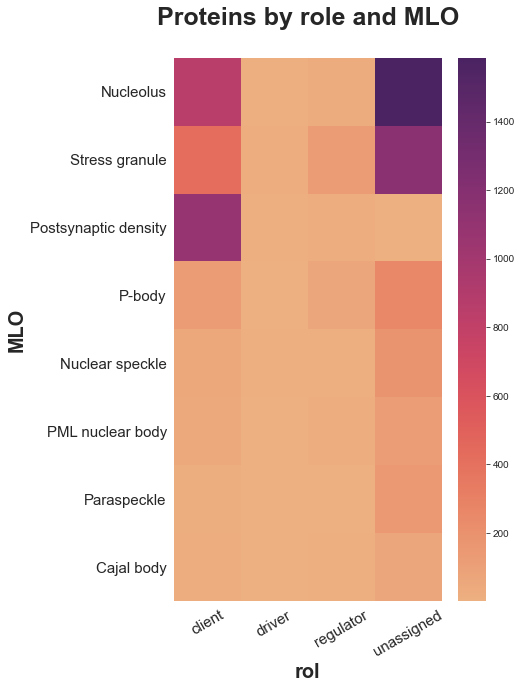

In [51]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6,10))
ax = sns.heatmap(_.dropna().drop(columns= 'suma'), cmap='flare')
ax.tick_params(labelsize=15)
ax.set_title("Proteins by role and MLO\n", fontsize=25, weight='bold')
ax.set_ylabel ("MLO", fontsize=20, weight='bold')
ax.set_xlabel ("rol", fontsize=20, weight='bold')
plt.xticks(rotation=30)
plt.show()
#fig.savefig("proteins_mlo_rol.png", dpi=300, bbox_inches='tight')


In [149]:
# sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize=(6,10))
# ax = sns.heatmap(_.dropna().drop(columns= ['suma', 'driver', 'regulator']), cmap='flare')
# ax.tick_params(labelsize=15)
# ax.set_title("Proteins by role and MLO\n", fontsize=25, weight='bold')
# ax.set_ylabel ("MLO", fontsize=20, weight='bold')
# ax.set_xlabel ("rol", fontsize=20, weight='bold')
# plt.show()

In [150]:
protein_has_mlo.drop_duplicates(['id_protein', 'rol']).query("mlo == 'Nuclear speckle'").rol.value_counts() # ok

unassigned    184
client         58
driver         11
regulator      10
Name: rol, dtype: int64

In [151]:
protein_has_mlo.drop_duplicates(['id_protein', 'rol'])

,reviewed,id_protein,id_proteinmlo,rol,mlo,dataset
0,lt,1,1,driver,cytoplasmic stress granule,phasepro
10,ht,1,11,unassigned,Paraspeckle,phasepdb
21,lt,2,22,driver,cytoplasmic stress granule,phasepro
22,lt,2,23,unassigned,Cajal body,phasepdb
41,lt,3,42,driver,nuclear protein granule,phasepro
...,...,...,...,...,...,...
11513,ht,5738,11514,unassigned,PML nuclear body,phasepdb
11514,ht,5739,11515,unassigned,Nucleolus,phasepdb
11515,ht,5740,11516,unassigned,Nucleolus,phasepdb
11517,NaN,5741,11518,client,Nucleolus,drllps


In [152]:
_.duplicated().any()

True

In [153]:
protein_has_mlo.query("mlo == 'P-body'")

,reviewed,id_protein,id_proteinmlo,rol,mlo,dataset
5,NaN,1,6,driver,P-body,drllps
29,ht,2,30,unassigned,P-body,phasepdb
34,NaN,2,35,driver,P-body,drllps
53,NaN,4,54,driver,P-body,drllps
91,NaN,6,92,driver,P-body,drllps
...,...,...,...,...,...,...
11402,ht,5659,11403,unassigned,P-body,phasepdb
11419,ht,5667,11420,unassigned,P-body,phasepdb
11434,ht,5681,11435,unassigned,P-body,phasepdb
11462,ht,5701,11463,unassigned,P-body,phasepdb


In [126]:
protein_rol = protein_has_mlo.merge(proteins, how='left')[['uniprot_name', 'rol', 'mlo']].value_counts()
protein_rol

uniprot_name  rol     mlo                 
DLG4_HUMAN    driver  Postsynaptic density    3
NPM_HUMAN     driver  Nucleolus               3
RBM14_HUMAN   driver  Paraspeckle             3
TADBP_HUMAN   driver  Stress granule          2
CCNT1_HUMAN   driver  Nuclear speckle         2
                                             ..
GNPAT_HUMAN   client  Postsynaptic density    1
GNL3_HUMAN    client  Nucleolus               1
GNL3L_HUMAN   client  Nucleolus               1
GNL1_HUMAN    client  Postsynaptic density    1
ZSC9_HUMAN    client  Others                  1
Length: 5321, dtype: int64

In [118]:
protein_rol.index

MultiIndex([('TADBP_HUMAN',    'driver'),
            (  'FUS_HUMAN',    'driver'),
            ( 'FMR1_HUMAN',    'driver'),
            ( 'ROA1_HUMAN',    'driver'),
            ( 'AGO2_HUMAN',    'driver'),
            ( 'RPB1_HUMAN',    'driver'),
            (  'TAU_HUMAN',    'driver'),
            ( 'ROA2_HUMAN',    'driver'),
            ('TNR6B_HUMAN',    'driver'),
            ( 'MED1_HUMAN',    'driver'),
            ...
            ('HSDL1_HUMAN',    'client'),
            ('HSDL2_HUMAN',    'client'),
            ( 'HSF1_HUMAN',    'driver'),
            ( 'HSF2_HUMAN',    'client'),
            ('HSP76_HUMAN',    'driver'),
            ('HSP7C_HUMAN',    'driver'),
            ('HSPB1_HUMAN',    'driver'),
            ('HSPB2_HUMAN', 'regulator'),
            ('HSPB3_HUMAN',    'driver'),
            ( 'ZSC9_HUMAN',    'client')],
           names=['uniprot_name', 'rol'], length=3817)

## stacked

In [154]:
stacked = pd.DataFrame(_.to_records()).drop(columns=['suma']).set_index('mlo')
stacked

,client,driver,regulator,unassigned
mlo,,,,
Nucleolus,854.0,12.0,30.0,1587.0
Stress granule,428.0,24.0,130.0,1164.0
Postsynaptic density,1086.0,11.0,23.0,5.0
P-body,128.0,7.0,67.0,261.0
Nuclear speckle,58.0,11.0,10.0,184.0
...,...,...,...,...
miRISC,NaN,1.0,NaN,NaN
nuclear protein granule,NaN,3.0,NaN,NaN
p62 cluster,NaN,1.0,NaN,NaN


In [155]:
# rearrange columns
cols = stacked.columns.to_list()
cols = cols[1:3] + [cols[0]] + [cols[-1]]
# reorder
stacked = stacked[cols]
stacked

,driver,regulator,client,unassigned
mlo,,,,
Nucleolus,12.0,30.0,854.0,1587.0
Stress granule,24.0,130.0,428.0,1164.0
Postsynaptic density,11.0,23.0,1086.0,5.0
P-body,7.0,67.0,128.0,261.0
Nuclear speckle,11.0,10.0,58.0,184.0
...,...,...,...,...
miRISC,1.0,NaN,NaN,NaN
nuclear protein granule,3.0,NaN,NaN,NaN
p62 cluster,1.0,NaN,NaN,NaN


In [195]:
# Invert rows 
stacked_sub = stacked.reindex(index=stacked.index[::-1])[-8:]
stacked_sub

,driver,regulator,client,unassigned
mlo,,,,
Cajal body,2.0,10.0,23.0,68.0
Paraspeckle,3.0,1.0,18.0,150.0
PML nuclear body,6.0,21.0,49.0,117.0
Nuclear speckle,11.0,10.0,58.0,184.0
P-body,7.0,67.0,128.0,261.0
Postsynaptic density,11.0,23.0,1086.0,5.0
Stress granule,24.0,130.0,428.0,1164.0
Nucleolus,12.0,30.0,854.0,1587.0


In [157]:
# colores por categorias
colors = [sns.color_palette("hls").as_hex()[2]]
colors.append(sns.color_palette("hls").as_hex()[0])
colors.append(sns.color_palette("hls").as_hex()[4])
colors.append(sns.color_palette("Set2").as_hex()[7])

In [158]:
colors

['#57db5f', '#db5f57', '#5f57db', '#b3b3b3']

In [77]:
# como lista de tuplas de rgb
#colors = [(87, 219, 95), (219, 95, 87), (95, 87, 219), (179, 179, 179)]

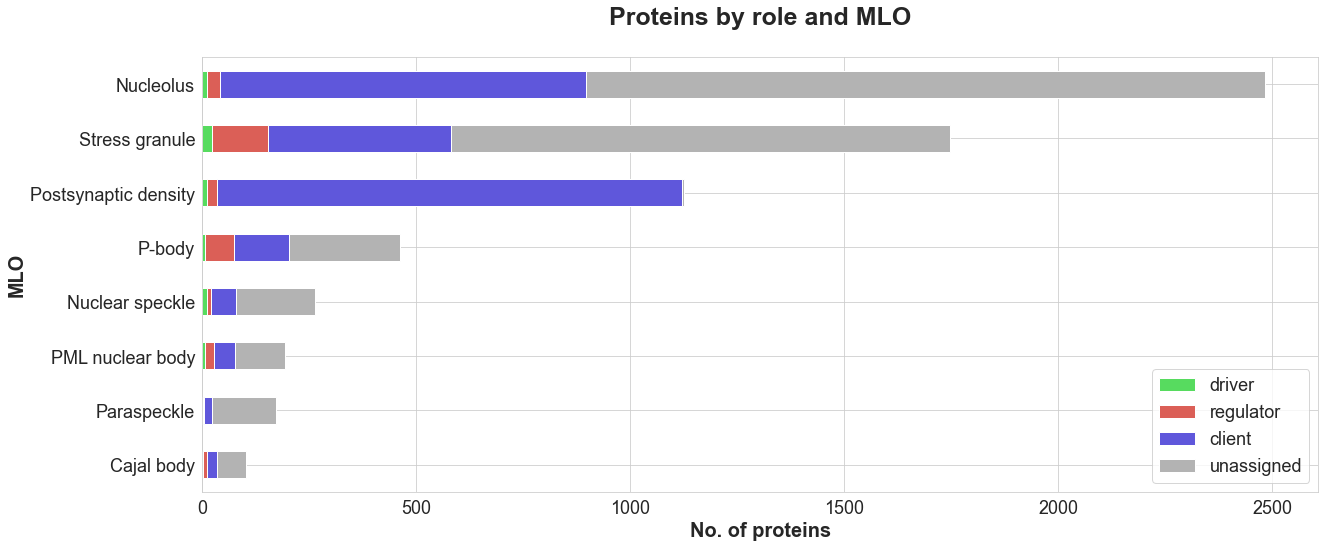

In [196]:
sns.set_style("whitegrid")
#fig, ax = plt.subplots(figsize=(12,10))
stacked_sub.plot.barh(stacked=True, figsize=(20,8), color = colors)
#stacked[:20].plot(kind='bar', stacked=True)
plt.tick_params(labelsize= 18)
plt.title("Proteins by role and MLO\n", fontsize=25, weight='bold')
plt.xlabel("No. of proteins", fontsize=20, weight='bold')
plt.ylabel("MLO", fontsize=20, weight='bold')
plt.legend(fontsize= 18)

#plt.savefig("proteins_mlo_rol_bar.png", dpi=300, bbox_inches = "tight")
plt.show()

# Proteins Role  
(driver, regulator, client, unassigned)

In [166]:
protein_rol = protein_has_mlo[['id_protein', 'rol']].drop_duplicates()
protein_rol

,id_protein,rol
0,1,driver
10,1,unassigned
21,2,driver
22,2,unassigned
41,3,driver
...,...,...
11513,5738,unassigned
11514,5739,unassigned
11515,5740,unassigned
11517,5741,client


In [167]:
protein_mutation = mutations[['id_protein', 'id_mutation']]
protein_mutation

,id_protein,id_mutation
0,3155,1
1,3155,2
2,3155,3
3,3155,4
4,3155,5
...,...,...
1660054,1542,221093
1660055,1542,221094
1660056,114,221095
1660057,5660,221096


In [170]:
protein_rol_mutation = protein_rol.merge(protein_mutation).drop_duplicates()
protein_rol_mutation

,id_protein,rol,id_mutation
0,1,driver,35995
1,1,driver,35996
2,1,driver,35997
3,1,driver,35998
4,1,driver,35999
...,...,...,...
2293511,5741,unassigned,1603642
2293512,5741,unassigned,1603643
2293513,5741,unassigned,1603644
2293514,5741,unassigned,1603645


In [171]:
protein_rol_mutation.groupby('rol').size()

rol
client         963374
driver         116083
regulator      123171
unassigned    1090888
dtype: int64

In [14]:
963374+116083+123171

1202628

# Proteins by role

In [173]:
# Roles sin tener en cuenta los NaNs (unassigned)
# recordar que el rol de la proteina esta ligado al mlo en la base de datos que proviene
# roles = protein_has_mlo.fillna("unassigned").rol.value_counts(dropna= False)

In [174]:
roles = protein_has_mlo.rol.value_counts()

In [175]:
roles

unassigned    6025
client        4138
driver         716
regulator      640
Name: rol, dtype: int64

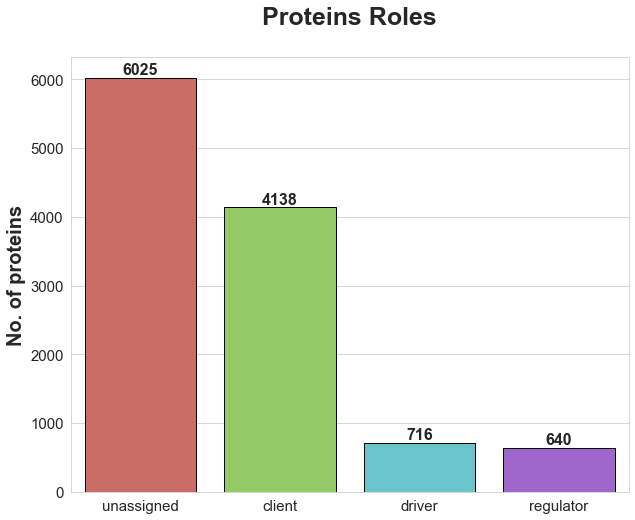

In [176]:
sns.set_style("whitegrid")
#sns.set_palette('turbo', 10)

bar,ax1 = plt.subplots(figsize=(10,8))
ax1 = sns.barplot(x= roles.index, y= roles, palette= "hls", edgecolor= 'black')
ax1.set_title("Proteins Roles\n", fontsize=25, weight='bold')
ax1.set_ylabel ("No. of proteins", fontsize=20, weight='bold')
ax1.tick_params(labelsize=15)
for i, v in enumerate(roles):
    ax1.text(i, v+50, str(v),  weight='bold', fontsize= 16, ha= 'center')

plt.show()
#bar.savefig("proeins_roles.png", dpi= 300)

In [7]:
protein_has_mlo[protein_has_mlo.dataset == 'phasepro'].drop_duplicates()

,reviewed,id_protein,id_proteinmlo,rol,mlo,dataset
0,lt,1,1,driver,cytoplasmic stress granule,phasepro
20,lt,1,21,driver,Cytoplasmic ribonucleoprotein granule,phasepro
21,lt,2,22,driver,cytoplasmic stress granule,phasepro
26,lt,2,27,driver,neuronal ribonucleoprotein granule,phasepro
27,lt,2,28,driver,synaptosome,phasepro
...,...,...,...,...,...,...
9654,lt,4472,9655,driver,Sam68 nuclear body,phasepro
9659,lt,4472,9660,driver,Nuclear body,phasepro
10753,lt,5252,10754,driver,Paraspeckle,phasepro
10957,lt,5368,10958,driver,Nucleolus,phasepro


In [47]:
protein_has_mlo[protein_has_mlo.dataset == 'phasepdb'].drop_duplicates()

,reviewed,id_protein,id_proteinmlo,rol,mlo,dataset
9,lt,1,10,driver,NaN,phasepdb
10,ht,1,11,NaN,Paraspeckle,phasepdb
11,ht,1,12,NaN,Nucleolus,phasepdb
12,ht,1,13,NaN,Stress granule,phasepdb
13,ht,1,14,NaN,Nuclear body,phasepdb
...,...,...,...,...,...,...
11513,ht,5738,11514,NaN,PML nuclear body,phasepdb
11514,ht,5739,11515,NaN,Nucleolus,phasepdb
11515,ht,5740,11516,NaN,Nucleolus,phasepdb
11516,ht,5740,11517,NaN,Nuclear speckle,phasepdb


In [6]:
protein_has_mlo[['id_protein',	'rol',	'mlo',	'dataset']].drop_duplicates().rol.value_counts()

client       4138
driver        716
regulator     640
Name: rol, dtype: int64

In [178]:
roles_b = protein_has_mlo[['id_protein', 'rol']].drop_duplicates().fillna("unassigned").rol.value_counts(dropna= False)
roles_b

unassigned    4105
client        3175
regulator      357
driver         285
Name: rol, dtype: int64

In [25]:
# paso al ultimo los unassigned
#roles_b = pd.concat([roles_b[1:], roles_b[:1]])
#roles_b

client        3175
regulator      357
driver         285
unassigned    4105
Name: rol, dtype: int64

In [179]:
# invierto el orden
roles_b = roles_b.iloc[::-1]
roles_b

driver         285
regulator      357
client        3175
unassigned    4105
Name: rol, dtype: int64

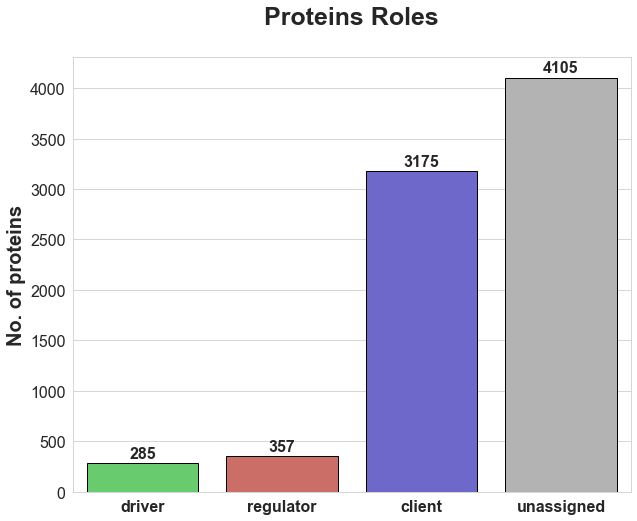

In [180]:
sns.set_style("whitegrid")
#sns.set_palette('turbo', 10)

bar,ax1 = plt.subplots(figsize=(10,8))

# Pallete
#colors = sns.color_palette("hls").as_hex()[2:5]
#colors.append(sns.color_palette("Set2").as_hex()[7])

colors = [sns.color_palette("hls").as_hex()[2]]
colors.append(sns.color_palette("hls").as_hex()[0])
colors.append(sns.color_palette("hls").as_hex()[4])
colors.append(sns.color_palette("Set2").as_hex()[7])

ax1 = sns.barplot(x= roles_b.index, y= roles_b, palette= colors, edgecolor= 'black')
ax1.set_title("Proteins Roles\n", fontsize=25, weight='bold')
ax1.set_ylabel ("No. of proteins", fontsize=20, weight='bold')
ax1.tick_params(labelsize=16)
plt.xticks(fontsize=16, weight= 'bold')
for i, v in enumerate(roles_b):
    ax1.text(i, v+50, str(v),  weight='bold', fontsize= 16, ha= 'center')


patch_h = []    
for patch in bar.patches:
    reading = patch.get_height()
    print(reading)
    patch_h.append(reading) # patch_h contains the heights of all the patches now



plt.show()
#bar.savefig("proeins_roles_b.png", dpi= 300)

In [167]:
sns.color_palette("hls")

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

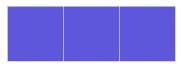

In [182]:
sns.palplot(sns.color_palette("hls")[4])

In [160]:
sns.color_palette("hls").as_hex()[2:5]

['#57db5f', '#57d3db', '#5f57db']

In [154]:
sns.color_palette("Set2").as_hex()[7]

'#b3b3b3'

In [184]:
colors = [sns.color_palette("hls").as_hex()[2]]
colors.append(sns.color_palette("hls").as_hex()[0])
colors.append(sns.color_palette("hls").as_hex()[4])
colors.append(sns.color_palette("Set2").as_hex()[7])

In [185]:
colors

['#57db5f', '#db5f57', '#5f57db', '#b3b3b3']

In [67]:
roles.sum()

5494

In [66]:
protein_has_mlo.rol.isna().sum()

6025

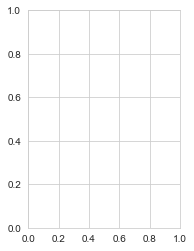

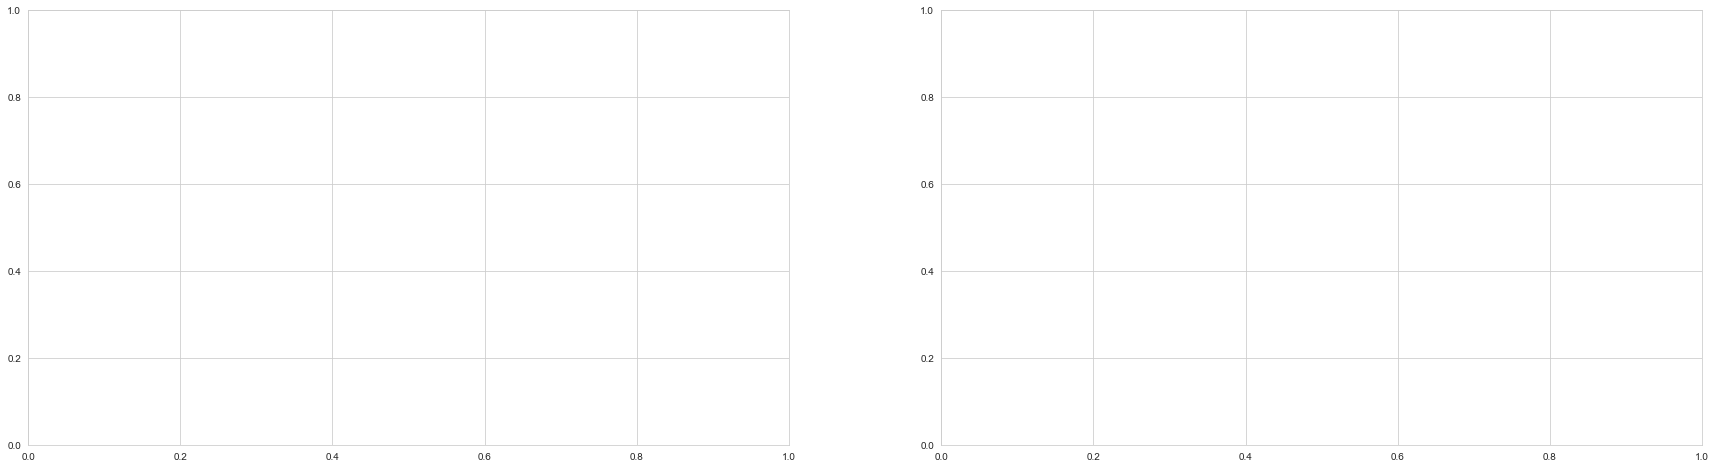

In [201]:
# Subplots
sns.set_style("whitegrid")
plt.subplot(121)
fig, ax = plt.subplots(figsize=(30,8), nrows=1, ncols=2)

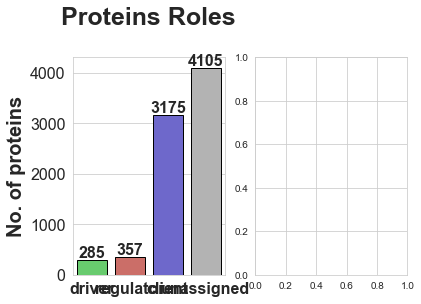

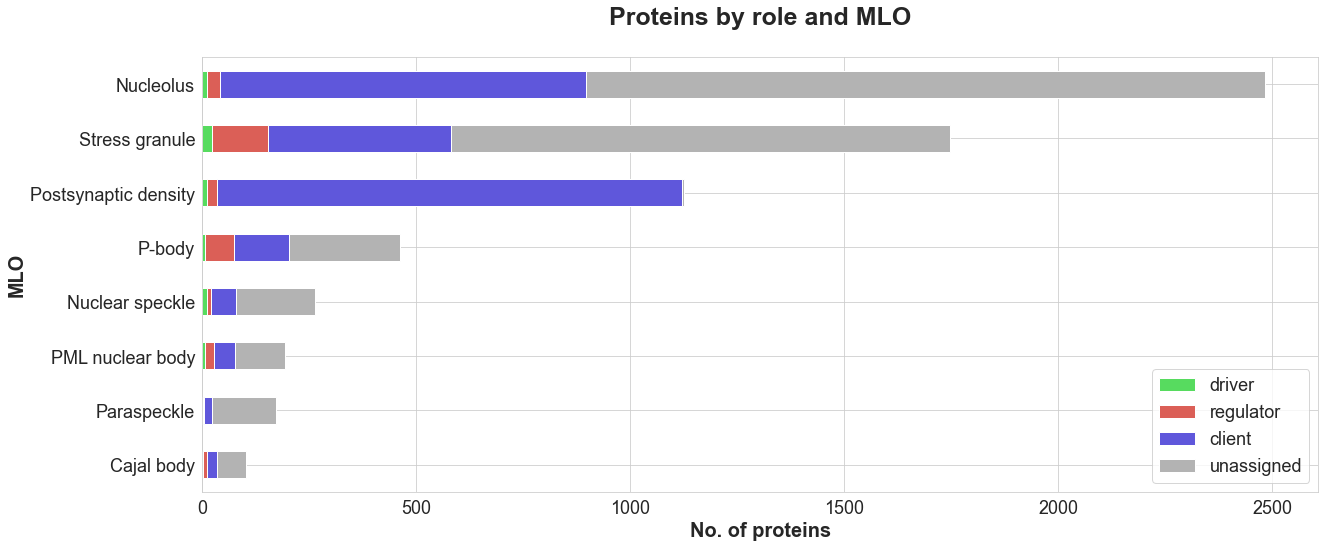

In [199]:
# Subplots
sns.set_style("whitegrid")
plt.subplot(121)
#plt.subplots(figsize=(10,8))

colors = [sns.color_palette("hls").as_hex()[2]]
colors.append(sns.color_palette("hls").as_hex()[0])
colors.append(sns.color_palette("hls").as_hex()[4])
colors.append(sns.color_palette("Set2").as_hex()[7])

sns.barplot(x= roles_b.index, y= roles_b, palette= colors, edgecolor= 'black')
plt.title("Proteins Roles\n", fontsize=25, weight='bold')
plt.ylabel ("No. of proteins", fontsize=20, weight='bold')
plt.tick_params(labelsize=16)
plt.xticks(fontsize=16, weight= 'bold')
for i, v in enumerate(roles_b):
    plt.text(i, v+50, str(v),  weight='bold', fontsize= 16, ha= 'center')


patch_h = []    
for patch in bar.patches:
    reading = patch.get_height()
    print(reading)
    patch_h.append(reading) # patch_h contains the heights of all the patches now

plt.subplot(122)
stacked_sub.plot.barh(stacked=True, figsize=(20,8), color = colors)
#stacked[:20].plot(kind='bar', stacked=True)
plt.tick_params(labelsize= 18)
plt.title("Proteins by role and MLO\n", fontsize=25, weight='bold')
plt.xlabel("No. of proteins", fontsize=20, weight='bold')
plt.ylabel("MLO", fontsize=20, weight='bold')
plt.legend(fontsize= 18)



plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(6,8))
# ax.bar(
#     ["Ordered", "PLDs", "IDRs", "Low-complexity"] ,
#     [ordered, prions, disordered, low],
#     color=["lightgray", "lightblue", "lightcoral", "lightgreen"],
#     width= 0.5
# )
# ax.set_ylabel("No. of mutations/ No. of amino acids", fontweight= "bold", fontdict={'fontsize': 12})
# ax.set_xlabel("Type of region", fontweight= "bold", fontdict={'fontsize': 12})
# ax.set_title("Proportion of mutations\nby type of region", fontweight="bold", fontdict={'fontsize': 15})
# ax.tick_params(axis= 'both', labelsize= 12)

# plt.show()

---

# Proteins by MLO

In [39]:
proteinsbymlo = protein_has_mlo[['id_protein', 'mlo']].drop_duplicates() # drop duplicates para no repetir pares proteina-MLO
proteinsbymlo = proteinsbymlo.id_protein.value_counts()
proteinsbymlo

4217    15
1       15
2       14
4126    14
4       13
        ..
4593     1
2546     1
499      1
4601     1
2047     1
Name: id_protein, Length: 5740, dtype: int64

In [42]:
proteinsbymlo.to_frame('mlo_counts')

,mlo_counts
4217,15
1,15
2,14
4126,14
4,13
...,...
4593,1
2546,1
499,1
4601,1


In [45]:
# Add protein names
proteinsbymlo_df = proteinsbymlo.to_frame('mlo_counts').join(proteins.set_index('id_protein')) #'mlo_counts' nombre de la col cdo se pasa de Series a df
proteinsbymlo_df

,mlo_counts,uniprot_acc,uniprot_name
4217,15,P22626,ROA2
1,15,P35637,FUS
2,14,Q06787,FMR1
4126,14,P09651,ROA1
4,13,Q13148,TADBP
...,...,...,...
4593,1,Q15629,TRAM1
2546,1,Q02252,MMSA
499,1,P61626,LYSC
4601,1,Q15773,MLF2


In [48]:
# La mayoria estan asociadas a un MLO
mlo_frequency = proteinsbymlo_df.mlo_counts.value_counts().to_frame()
mlo_frequency

,mlo_counts
1,3729
2,1242
3,429
4,167
5,81
6,34
7,29
8,11
9,8
10,4


In [57]:
# otra forma
protein_has_mlo[['id_protein', 'mlo']].drop_duplicates().groupby('id_protein').count().value_counts() #VER

mlo
1      3723
2      1248
3       423
4       165
5        77
6        35
0        22
7        22
8         9
9         9
13        2
14        2
10        1
11        1
12        1
dtype: int64

In [14]:
pal = sns.color_palette("hls")
pal = pal.as_hex()

In [217]:
pal[2]

'#57db5f'

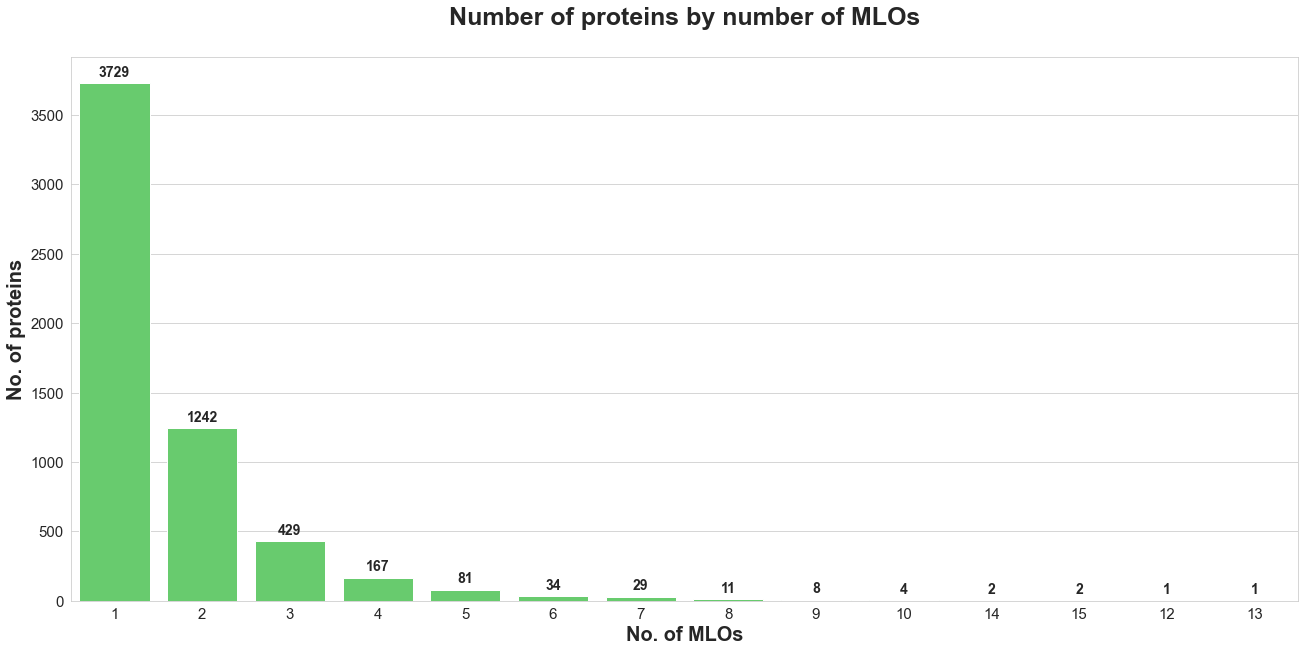

In [69]:
sns.set_style("whitegrid")
bar, ax = plt.subplots(figsize=(22,10))
ax = sns.barplot(x= mlo_frequency.index, y= mlo_frequency.mlo_counts, color= pal[2])
ax.tick_params(labelsize=15)
ax.set_xlim(-.5, 13.5)
ax.set_title("Number of proteins by number of MLOs\n", fontsize=25, weight='bold')
ax.set_ylabel ("No. of proteins", fontsize=20, weight='bold')
ax.set_xlabel ("No. of MLOs", fontsize=20, weight='bold')
ax.set_xticklabels(mlo_frequency.index)

for i, y in enumerate(mlo_frequency.mlo_counts):
    ax.text(i, y+50, str(y), weight='bold', fontsize=14, horizontalalignment='center')


plt.show()
#bar.savefig("number_proteins_mlo_b.png", dpi=300)

# Mutations by Role

In [ ]:
# Drivers, Regulators or Clients with the most absolute number of mutations


In [63]:
protein_has_mlo

,reviewed,id_protein,id_proteinmlo,rol,mlo,dataset
0,lt,1,1,driver,cytoplasmic stress granule,phasepro
1,NaN,1,2,driver,Gemini of cajal body,drllps
2,NaN,1,3,driver,Nuclear speckle,drllps
3,NaN,1,4,driver,Nucleolus,drllps
4,NaN,1,5,driver,Paraspeckle,drllps
...,...,...,...,...,...,...
11514,ht,5739,11515,NaN,Nucleolus,phasepdb
11515,ht,5740,11516,NaN,Nucleolus,phasepdb
11516,ht,5740,11517,NaN,Nuclear speckle,phasepdb
11517,NaN,5741,11518,client,Nucleolus,drllps


In [65]:
mutations.columns

Index(['id_mutation', 'snp_id', 'chromosome', 'start_genomic', 'end_genomic',
       'start_aa', 'end_aa', 'notation_cds', 'notation_aa', 'id_protein',
       'id_consequence', 'consequence'],
      dtype='object')

In [67]:
mutations.head()

,id_mutation,snp_id,chromosome,start_genomic,end_genomic,start_aa,end_aa,notation_cds,notation_aa,id_protein,id_consequence,consequence
0,1,rs184639841,16,2500291.0,2500291.0,442,442,c.1326C>T,p.Y442=,3155,2,synonym
1,2,rs12373107,16,2500405.0,2500405.0,480,480,c.1440G>A,p.S480=,3155,2,synonym
2,3,rs201059992,16,2500465.0,2500465.0,500,500,c.1500G>A,p.A500=,3155,2,synonym
3,4,rs189089167,16,2500474.0,2500474.0,503,503,c.1509C>T,p.S503=,3155,2,synonym
4,5,rs13339237,16,2496355.0,2496355.0,69,69,c.207T>C,p.P69=,3155,2,synonym


In [75]:
mutations_rol = mutations[['id_mutation', 'id_protein', 'consequence']]

In [76]:
mutations_rol.duplicated().any()

False

In [79]:
protein_has_mlo[['id_protein',	'rol',	'mlo',	'dataset']]

,id_protein,rol,mlo,dataset
0,1,driver,cytoplasmic stress granule,phasepro
1,1,driver,Gemini of cajal body,drllps
2,1,driver,Nuclear speckle,drllps
3,1,driver,Nucleolus,drllps
4,1,driver,Paraspeckle,drllps
...,...,...,...,...
11514,5739,NaN,Nucleolus,phasepdb
11515,5740,NaN,Nucleolus,phasepdb
11516,5740,NaN,Nuclear speckle,phasepdb
11517,5741,client,Nucleolus,drllps


In [83]:
mutations_rol = protein_has_mlo.merge(mutations_rol, on= 'id_protein', how='left').drop(columns= ['reviewed', 'id_proteinmlo']).drop_duplicates()
mutations_rol

,id_protein,rol,mlo,dataset,id_mutation,consequence
0,1,driver,cytoplasmic stress granule,phasepro,35995.0,synonym
1,1,driver,cytoplasmic stress granule,phasepro,35996.0,synonym
2,1,driver,cytoplasmic stress granule,phasepro,35997.0,synonym
3,1,driver,cytoplasmic stress granule,phasepro,35998.0,synonym
4,1,driver,cytoplasmic stress granule,phasepro,35999.0,synonym
...,...,...,...,...,...,...
3345054,5741,NaN,Nucleolus,phasepdb,1603642.0,nonsense
3345055,5741,NaN,Nucleolus,phasepdb,1603643.0,nonsense
3345056,5741,NaN,Nucleolus,phasepdb,1603644.0,nonsense
3345057,5741,NaN,Nucleolus,phasepdb,1603645.0,nonsense


In [101]:
mutations_rol.rol.fillna("unassigned", inplace= True)

In [102]:
mutations_rol.id_mutation.isna().sum()

204

In [128]:
mutations_rol_group = mutations_rol.groupby(['id_protein', 'rol'])['id_mutation'].count().sort_values(ascending= False).reset_index()
mutations_rol_group

,id_protein,rol,id_mutation
0,825,client,25416
1,5106,unassigned,20552
2,2358,client,20079
3,1876,client,18474
4,376,regulator,18354
...,...,...,...
7917,4332,unassigned,0
7918,2206,client,0
7919,3684,unassigned,0
7920,3451,driver,0


In [131]:
mutations_rol_group = mutations_rol_group.merge(proteins).drop(columns= ['id_protein', 'uniprot_acc']).sort_values(by= 'id_mutation', ascending= False)
mutations_rol_group

,rol,id_mutation,uniprot_name
0,client,25416,ATM
2,unassigned,20552,TITIN
3,client,20079,SYNE1
4,client,18474,APC
6,regulator,18354,BRCA1
...,...,...,...
7801,unassigned,0,F5H2Z3
7802,regulator,0,EIF3I
7803,unassigned,0,EIF3I
7804,unassigned,0,F5H169


<BarContainer object of 20 artists>

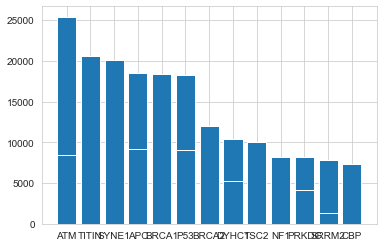

In [125]:
plt.bar(mutations_rol_group.uniprot_name[:20], mutations_rol_group.id_mutation[:20])

<AxesSubplot:xlabel='uniprot_name', ylabel='count'>

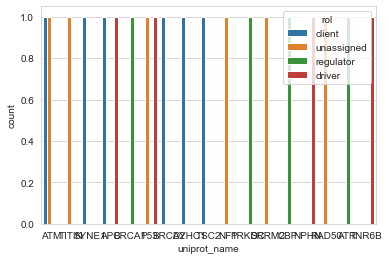

In [132]:
_ = mutations_rol_group[:20]
sns.countplot(x="uniprot_name", hue= "rol", data = _)

<AxesSubplot:xlabel='uniprot_name', ylabel='Count'>

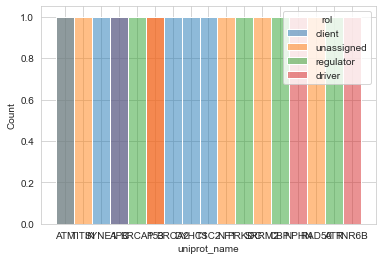

In [133]:
sns.histplot(data= _, x="uniprot_name", hue= "rol")

In [108]:
proteins[proteins.id_protein == 825]

,id_protein,uniprot_acc,uniprot_name
824,825,Q13315,ATM


# Proteins by MLOs

In [6]:
# Frequency distribution plot
mlo_protein = protein_has_mlo.groupby('mlo')['id_protein'].count().sort_values(ascending = False)
mlo_protein

mlo
Nucleolus                                         3315
Stress granule                                    2529
Postsynaptic density                              1388
P-body                                             818
Centrosome/Spindle pole body                       534
                                                  ... 
collagen-containing extracellular matrix             1
condensed compartments of microtubule bundling       1
cytoplasmic microtubule                              1
euchromatin                                          1
synaptosome                                          1
Name: id_protein, Length: 103, dtype: int64

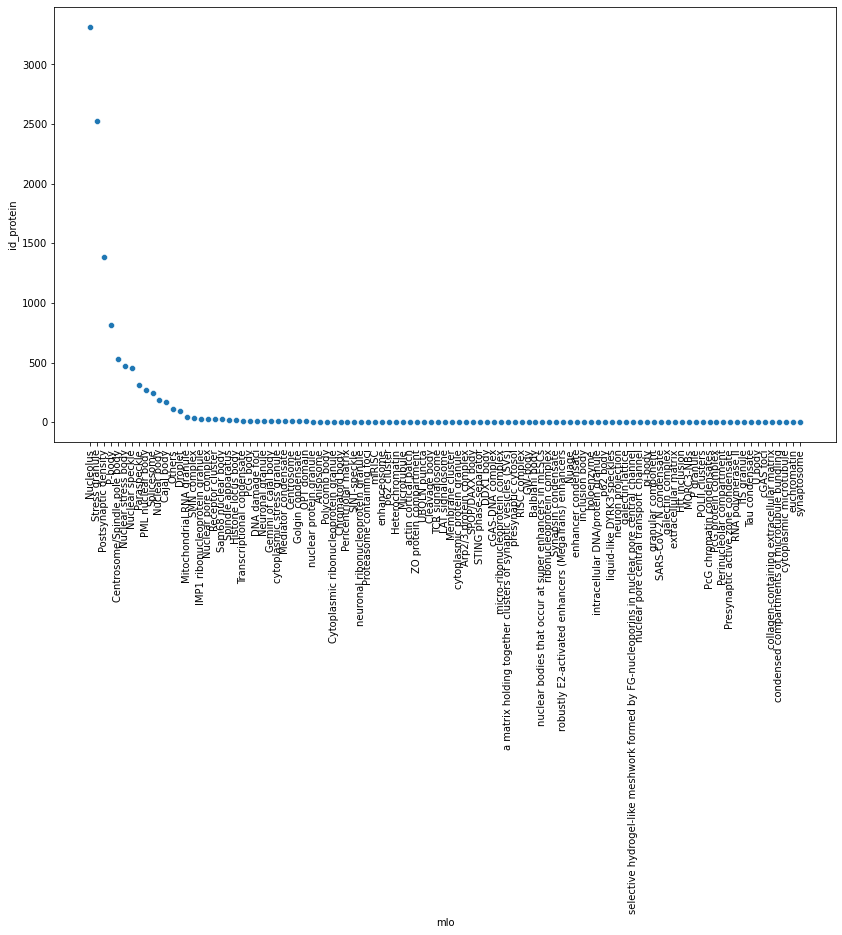

In [7]:
bar, ax = plt.subplots(figsize=(14,8))
ax = sns.scatterplot(x= mlo_protein.index, y= mlo_protein)
ax.tick_params(axis='x', labelrotation= 90)
plt.show()

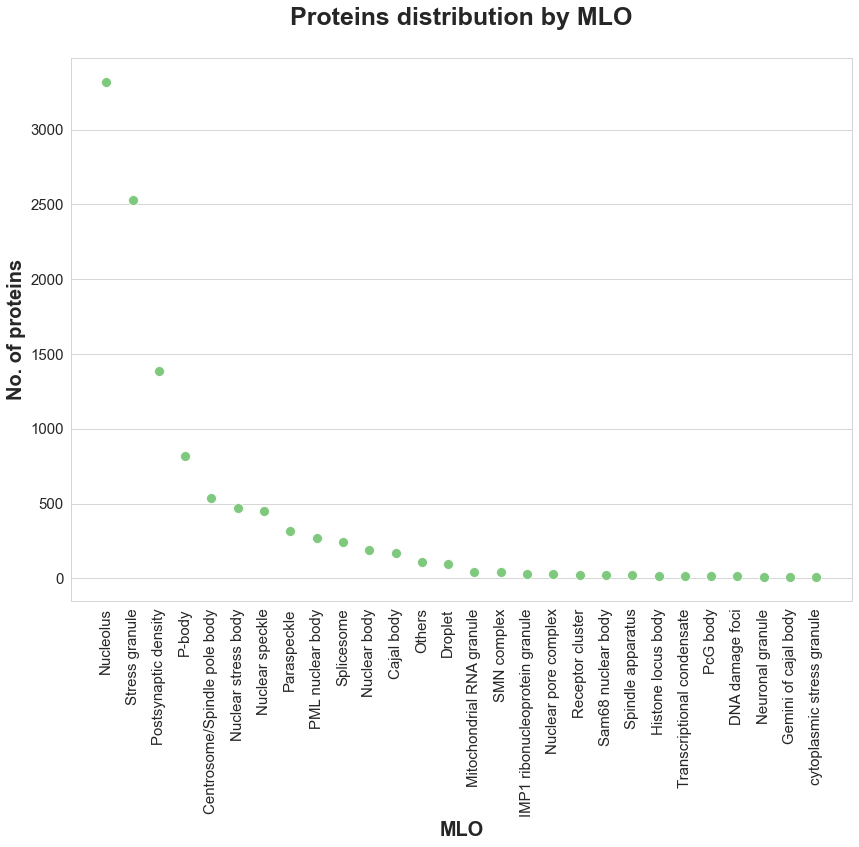

In [35]:
# MLOs con > 10 proteinas asociadas
sns.set_style("whitegrid")
sns.set_palette("Accent")
bar, ax = plt.subplots(figsize=(14,10))
ax = sns.scatterplot(x= mlo_protein[mlo_protein >= 10].index, y= mlo_protein[mlo_protein >= 10], s= 100)
ax.tick_params(labelsize=15)
ax.tick_params(axis='x', labelrotation= 90)
ax.grid(axis="x")
ax.set_title("Proteins distribution by MLO\n", fontsize=25, weight='bold')
ax.set_ylabel ("No. of proteins", fontsize=20, weight='bold')
ax.set_xlabel ("MLO", fontsize=20, weight='bold')
plt.show()
#bar.savefig("proteins_mlos.png", dpi= 300, bbox_inches='tight')

# Mutations by domains

## Pfam data

In [86]:
mutation_pfam = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')
pfam_domain = pd.read_csv('../db_tables/pfam_domain.tsv', sep='\t')
mutation_pfam = mutation_pfam.merge(pfam_domain)

In [87]:
# groupby the column to group on "name". Then, ["id_mutation"] to specify the col to perform the actual aggregation.
pfam = mutation_pfam.groupby('pfam_domain')['id_mutation'].count().sort_values(ascending= False)

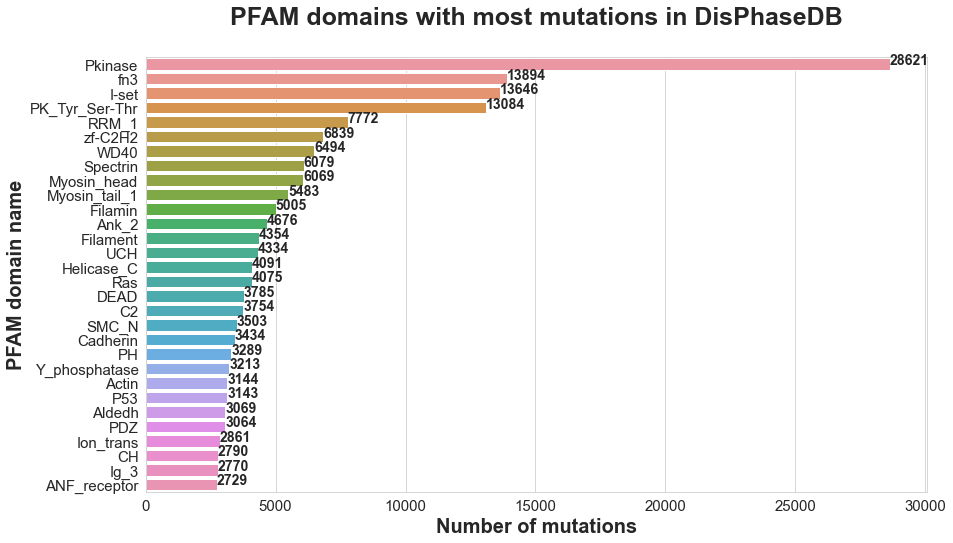

In [90]:
pfam_others = pd.Series({'others': pfam[10:].sum()})
pfam_topten = pfam[:30]
pfam_topten_others= pd.concat([pfam_others, pfam_topten])
# PLOT Top Ten mutations in PFAM domains
# Horizontal barplot
sns.set_style("whitegrid")
sns.set_palette("husl", 1)

bar,ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x= pfam_topten, y= pfam_topten.index, orient='h')
ax.set_title("PFAM domains with most mutations in DisPhaseDB\n", fontsize=25, weight='bold')
ax.set_xlabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_ylabel ("PFAM domain name", fontsize=20, weight='bold')
ax.tick_params(labelsize=15)
for i, v in enumerate(pfam_topten):
    ax.text(v, i, str(v), weight='bold', fontsize=14)

plt.show()

# Others

## PFam formated

In [91]:
rol = pd.read_csv('../db_tables/rol.tsv', sep='\t')
mlo = pd.read_csv('../db_tables/mlo.tsv', sep='\t')
protein_has_mlo = pd.read_csv('../db_tables/protein_has_mlo.tsv', sep='\t').merge(rol).merge(mlo).drop(columns=['id_rol', 'id_mlo'])

In [58]:
mutation_has_pfam_domain = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')
# Mutaciones en DOMINIOS PFAM
#mutation_pfam = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')

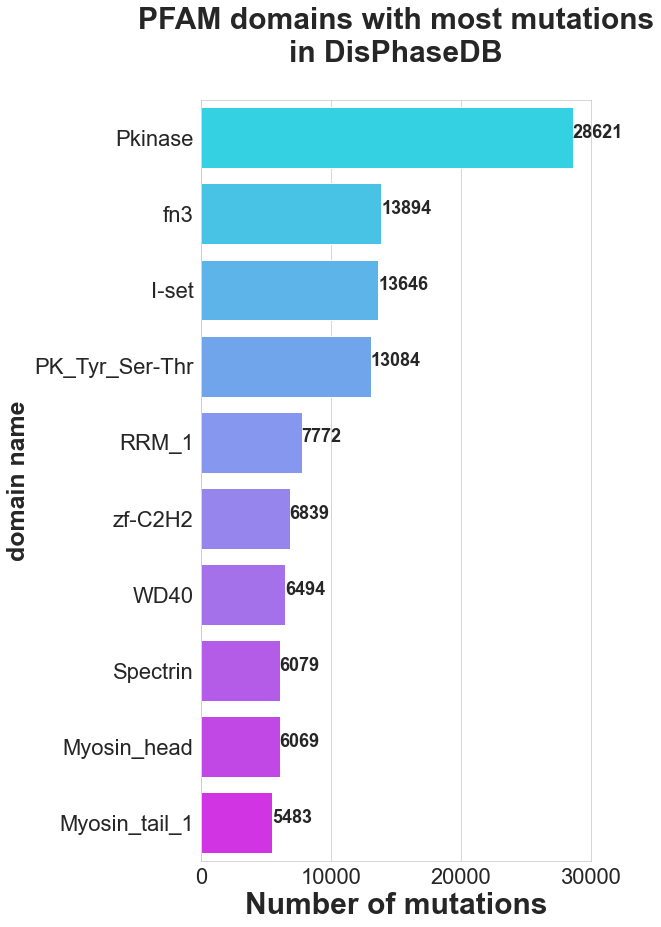

In [92]:

len(mutation_has_pfam_domain.id_mutation.unique()) # 80837 mutaciones en PFAM domains
len(mutation_has_pfam_domain.id_pfam.unique()) # 1639 PFAM domains con mutaciones



# Verificar si estan las mutaciones que se eliminaron
# Este es un subset son las que ya no van (en este caso 9)
#eliminar = mutation_pfam[~mutation_pfam.id_mutation.isin(mutations.id_mutation)]
# Con esto las elimino:
#mutation_pfam = mutation_pfam[~mutation_pfam.id_mutation.isin(eliminar.id_mutation)]

# %% Traer el nombre de los PFAM acc
pfam_domain = pd.read_csv('../db_tables/pfam_domain.tsv', sep='\t')
mutation_pfam = mutation_pfam.merge(pfam_domain)
# %% Tengo que agrupar 
# groupby the column to group on "name". Then, ["id_mutation"] to specify the col to perform the actual aggregation.
pfam = mutation_pfam.groupby('pfam_domain')['id_mutation'].count().sort_values(ascending= False)
# %%
pfam_others = pd.Series({'others': pfam[10:].sum()})
pfam_topten = pfam[:10]
pfam_topten_others= pd.concat([pfam_others, pfam_topten])
# %% PLOT Top Ten mutations in PFAM domains
# Horizontal barplot
sns.set_style("whitegrid")
sns.set_palette("cool", 10)

bar,ax = plt.subplots(figsize=(7,14))
ax = sns.barplot(x= pfam_topten, y= pfam_topten.index, orient='h')
ax.set_title("PFAM domains with most mutations\nin DisPhaseDB\n", fontsize=30, weight='bold')
ax.set_xlabel ("Number of mutations", fontsize=30, weight='bold')
ax.set_ylabel ("domain name", fontsize=25, weight='bold')
ax.tick_params(labelsize=22)
for i, v in enumerate(pfam_topten):
    ax.text(v, i, str(v), weight='bold', fontsize=18)

plt.savefig("pfam_mutations.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# Disordered Regions: IDRs, LCs, PLDs

## IDRs

In [4]:
disorder_region = pd.read_csv('../db_tables/disorder_region.tsv', sep='\t')
mutation_has_disorder = pd.read_csv('../db_tables/mutation_has_disorder_region.tsv', sep='\t')
protein = pd.read_csv(
    '../db_tables/protein.tsv',
    sep='\t',
    usecols=['id_protein', 'length', 'disorder_content']
)

In [5]:
disorder_region

,start,end,id_idr,length,id_protein
0,1,286,7538,286,1
1,375,424,7539,50,1
2,444,526,7540,83,1
3,325,349,7467,25,2
4,443,632,7468,190,2
...,...,...,...,...,...
8672,1244,1274,1198,31,5737
8673,1,136,1194,136,5737
8674,330,349,3394,20,5738
8675,260,325,3393,66,5738


In [7]:
mutation_has_disorder

,id_mutation,id_idr
0,35995,7538
1,35996,7538
2,35997,7538
3,35998,7540
4,35999,7538
...,...,...
256126,738065,3393
256127,738067,3393
256128,1581702,3393
256129,551013,3305


In [6]:
dis_mutations = mutation_has_disorder.merge(disorder_region[['id_idr', 'length', 'id_protein']], how= 'left')
dis_mutations.sort_values("id_idr")

,id_mutation,id_idr,length,id_protein
199106,798589,1,22,4305
199098,285481,1,22,4305
199099,285486,1,22,4305
199100,798558,1,22,4305
199101,798562,1,22,4305
...,...,...,...,...
123346,1425965,8647,26,2661
123349,1425980,8647,26,2661
123352,1426003,8647,26,2661
123366,1426126,8647,26,2661


In [7]:
idr_len = dis_mutations[["id_idr", 'length', 'id_protein']].drop_duplicates()
idr_len

,id_idr,length,id_protein
0,7538,286,1
3,7540,83,1
5,7539,50,1
254,7468,190,2
272,7467,25,2
...,...,...,...
255978,1196,34,5737
255981,1198,31,5737
256094,3393,66,5738
256097,3394,20,5738


In [8]:
box_idr = dis_mutations.groupby("id_idr")["id_mutation"].count().to_frame().reset_index().merge(idr_len).rename(columns= {'id_mutation': 'no_mutations'})
box_idr["ratio_idr"] = box_idr.no_mutations/ box_idr.length
box_idr.sort_values("ratio_idr")

,id_idr,no_mutations,length,id_protein,ratio_idr
2472,2622,1,216,942,0.004630
2473,2623,2,422,942,0.004739
2471,2621,2,257,942,0.007782
2853,3034,2,237,3,0.008439
4184,4440,1,113,4611,0.008850
...,...,...,...,...,...
442,471,473,73,1876,6.479452
3211,3407,559,77,3542,7.259740
6438,6840,204,24,1212,8.500000
1945,2052,441,47,75,9.382979


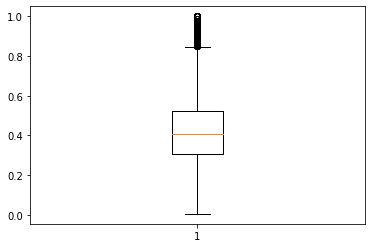

In [9]:
plt.boxplot(box_idr.ratio_idr[box_idr.ratio_idr <=1])
plt.show()

In [10]:
# Considerar el ratio en todos los idr que tenga una proteina
mutations_idr = box_idr.groupby("id_protein")[["no_mutations", "length"]].sum().reset_index()
mutations_idr["ratio_idr"] = mutations_idr.no_mutations/ mutations_idr.length
mutations_idr

,id_protein,no_mutations,length,ratio_idr
0,1,254,419,0.606205
1,2,131,215,0.609302
2,3,14,457,0.030635
3,4,29,76,0.381579
4,5,235,426,0.551643
...,...,...,...,...
3229,5733,31,100,0.310000
3230,5735,37,95,0.389474
3231,5737,132,281,0.469751
3232,5738,35,86,0.406977


## Tomar dos puntos: mutaciones en IDRs y mutaciones no-IDRs.  
Luego hacer el cociente de los ratios

In [11]:
# Traer todas las proteinas que contienen IDRs
prot_idr_unique = box_idr.id_protein.unique()

In [13]:
# Estas son las mutaciones en regiones IDR
dis_mutations.id_mutation.unique()

array([  35995,   35996,   35997, ..., 1581702,  551013,  800516],
      dtype=int64)

In [14]:
# Traigo las mutaciones que NO caen en IDRs
# 1ro: filtrar en la tabla de mutations las mutaciones que no son IDR
mutations_no_idr = mutations[~mutations.id_mutation.isin(dis_mutations.id_mutation.unique())]

# 2do: de ese subset traer las mutaciones No-IDR en proteinas con IDRs
mutations_no_idr = mutations_no_idr[mutations_no_idr.id_protein.isin(prot_idr_unique)][['id_mutation', 'id_protein']]
mutations_no_idr

,id_mutation,id_protein
101,102,1628
102,103,1628
103,104,1628
104,105,1628
105,106,1628
...,...,...
1660034,221073,557
1660038,221077,2547
1660040,221079,361
1660044,221083,3170


In [15]:
mutations_no_idr.duplicated().any()

False

In [16]:
# Dataframe con nro. de mutaciones por proteina
mutations_no_idr = mutations_no_idr.groupby("id_protein").count().reset_index().rename(columns= {'id_mutation': 'no_mutations'}).sort_values('no_mutations')
mutations_no_idr

,id_protein,no_mutations
3027,5398,1
2924,5218,1
558,942,1
1887,3274,1
2144,3667,1
...,...,...
1935,3355,6017
1406,2358,6587
239,376,7780
785,1351,11757


In [17]:
proteins[proteins.id_protein == 5106]

,id_protein,uniprot_acc,uniprot_name
5105,5106,Q8WZ42,TITIN_HUMAN


In [18]:
prot_mut_no_idr = mutations_no_idr.merge(protein[['id_protein', 'length']], how='left')
prot_mut_no_idr["ratio_noidr"] = prot_mut_no_idr.no_mutations/ prot_mut_no_idr.length
prot_mut_no_idr

,id_protein,no_mutations,length,ratio_noidr
0,5398,1,243,0.004115
1,5218,1,963,0.001038
2,942,1,2229,0.000449
3,3274,1,227,0.004405
4,3667,1,118,0.008475
...,...,...,...,...
3217,3355,6017,4967,1.211395
3218,2358,6587,8797,0.748778
3219,376,7780,1863,4.176060
3220,1351,11757,3418,3.439731


In [19]:
# Razon de ratios: regiones no-idr/ regiones idr
idr_ratios = mutations_idr[['id_protein', 'ratio_idr']].merge(prot_mut_no_idr[['id_protein', 'ratio_noidr']])
idr_ratios["rate"] = idr_ratios.ratio_idr/ idr_ratios.ratio_noidr
idr_ratios.sort_values("rate")

,id_protein,ratio_idr,ratio_noidr,rate
3101,5517,0.045455,0.460674,0.098670
649,1115,0.037037,0.370138,0.100063
2592,4654,0.047619,0.413115,0.115268
2034,3506,0.033333,0.284314,0.117241
2662,4780,0.037037,0.304114,0.121786
...,...,...,...,...
609,1037,0.360000,0.010000,36.000000
287,467,0.431034,0.010724,40.193966
2440,4373,0.458716,0.009174,50.000000
3027,5398,0.436214,0.004115,106.000000


In [162]:
idr_ratios.rate.describe()

count    3222.000000
mean        1.690948
std         3.690462
min         0.098670
25%         1.038934
50%         1.324845
75%         1.690176
max       145.000000
Name: rate, dtype: float64

In [20]:
idr_ratios.rate.median()

1.3248448255263616

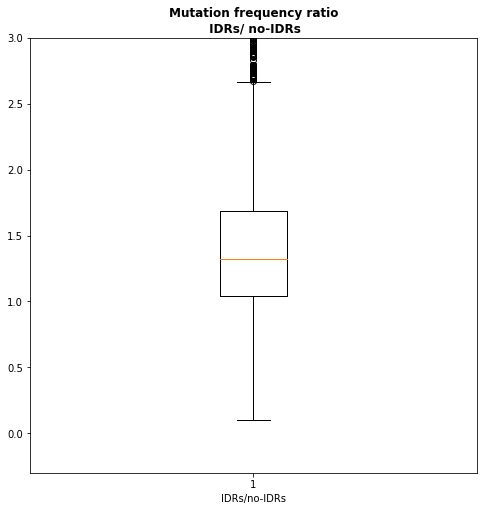

In [21]:
plt.figure(figsize=(8, 8))
plt.boxplot(idr_ratios.rate)
plt.title("Mutation frequency ratio\n IDRs/ no-IDRs", fontweight= "bold")
plt.xlabel("IDRs/no-IDRs")
plt.ylim(-.3,3)
plt.show()

## Opcion 2: Background  
Considerar una mutacion por residuo (es decir, mutado o no)  
background = total_res_mutados / total_res  
idr_enrichment_mut = ( idr_res_mutados / idr_res ) / background  

In [ ]:
# IDRs


---

In [24]:
# sumar los length de idrs
dis_aa = disorder_region.length.sum() # 574_352 aa desordenados
# los de las protein total
total_aa = protein.length.sum() # 3_718_008 totales
# aa ordenados
ord_aa = total_aa - dis_aa # 3_143_656

In [25]:
# fraccion de desorden
print(f'Fraccion de desorden: {dis_aa/total_aa}') #0.15

# mutaciones en idrs
mut_idr = len(mutation_has_disorder) # 256_131

# mutaciones por idrs aa
mut_idr/dis_aa # 0.44
# mutaciones por aa totales
#mut_idr/total_aa # 0.06

# mutaciones en region No idr
mut_no_idr = len(mutations[~mutations.id_mutation.isin(mutation_has_disorder.id_mutation)]) #1_403_935
mut_no_idr/total_aa # 0.37

Fraccion de desorden: 0.15447841962685396


0.3776040826162827

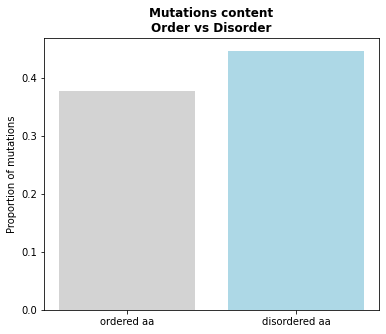

In [26]:
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(["ordered aa", "disordered aa"] , [mut_no_idr/total_aa, mut_idr/dis_aa], color=["lightgray", "lightblue"])
ax.set_ylabel("Proportion of mutations")
ax.set_title("Mutations content\nOrder vs Disorder", fontweight="bold")
plt.show()


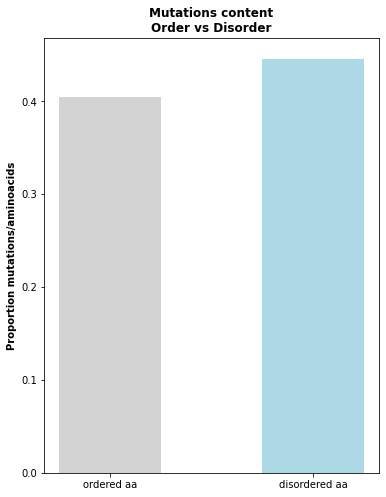

In [27]:
# COnsiderar solo 1 mut por aa
# subset de una sola mutacion por aa
mut_aa_unique = mutations[['start_aa', 'end_aa', 'id_protein']].drop_duplicates() # esto es tanto ordenados como desordenados
# eliminar mutaciones en rangos
mut_aa_unique = mut_aa_unique[mut_aa_unique.end_aa - mut_aa_unique.start_aa == 0]

# Ahora sumar todos los aa en estas proteinas
mut_aa_unique.id_protein.unique() # 5402
total_unique_aa = protein[protein.id_protein.isin(mut_aa_unique.id_protein.unique())].length.sum() # 3514830

# Sacar el nro de ordenados
ord_unique_aa = total_unique_aa - dis_aa
# coeficiente
len(mut_aa_unique)/total_unique_aa #0.348


# ahora ver idrs
idr = mutation_has_disorder.merge(disorder_region)
idr[idr.id_protein.isin(mut_aa_unique.id_protein.unique())] # estan todas

# Plot
fig, ax = plt.subplots(figsize=(6,8))
ax.bar(
    ["ordered aa", "disordered aa"] ,
    [len(mut_aa_unique)/ord_unique_aa, mut_idr/dis_aa],
    color=["lightgray", "lightblue"],
    width= 0.5
)
ax.set_ylabel("Proportion mutations/aminoacids", fontweight= "bold")
ax.set_title("Mutations content\nOrder vs Disorder", fontweight="bold")
plt.show()

## Low-complexity Regions

In [29]:
low_complexity = pd.read_csv('../db_tables/low_complexity.tsv', sep= '\t')
mutation_has_low_complexity = pd.read_csv('../db_tables/mutation_has_low_complexity.tsv', sep= '\t')

In [30]:
mutation_has_low_complexity

,id_mutation,id_lc
0,35995,15785
1,35996,15785
2,35997,15785
3,35998,15788
4,35999,15785
...,...,...
155019,1048138,14495
155020,1048141,14495
155021,1048144,14495
155022,1048181,14496


In [41]:
#mutation_has_low_complexity.set_index('id_lc').join(low_complexity.set_index('id_lc')).reset_index()

In [31]:
mutation_has_lc = low_complexity.merge(mutation_has_low_complexity, on='id_lc', how= 'right').sort_values('id_lc')
mutation_has_lc

,start,end,id_lc,length,id_protein,id_mutation
47295,236,243,1,8,1679,623599
47294,236,243,1,8,1679,226462
47293,236,243,1,8,1679,226459
47292,236,243,1,8,1679,55820
59073,235,247,2,13,2077,237430
...,...,...,...,...,...,...
75795,444,460,18212,17,2661,1425938
75793,444,460,18212,17,2661,1425928
75809,444,460,18212,17,2661,1426116
75803,444,460,18212,17,2661,1426018


In [32]:
mutation_has_lc.duplicated().any()

False

In [33]:
mutation_has_lc.id_mutation.value_counts()

553607     5
557234     5
553395     4
551072     3
556313     3
          ..
163429     1
945767     1
136808     1
1187433    1
2047       1
Name: id_mutation, Length: 155000, dtype: int64

In [34]:
mutation_has_lc[mutation_has_lc.id_mutation == 553607]

,start,end,id_lc,length,id_protein,id_mutation
133256,1491,1503,445,13,4902,553607
133257,1656,1668,446,13,4902,553607
133258,1821,1833,447,13,4902,553607
133259,1986,1998,448,13,4902,553607
133260,2151,2163,449,13,4902,553607


In [35]:
# Low complexity aminoacids
lc_aa = low_complexity.length.sum()
# Low complexity mutations
lc_mut = len(mutation_has_low_complexity.id_mutation.unique())

In [36]:
lc_mut/lc_aa

0.4440484614437018

In [37]:
lc_len = mutation_has_lc[['id_lc', 'length']].drop_duplicates()

In [38]:
# Para el boxplot
box_lc = mutation_has_lc.groupby("id_lc")["id_mutation"].count().to_frame().reset_index().merge(lc_len).rename(columns= {'id_mutation': 'no_mutations'})
box_lc["ratio"] = box_lc.no_mutations/ box_lc.length
box_lc.sort_values("ratio")

,id_lc,no_mutations,length,ratio
2693,2885,1,56,0.017857
2700,2892,2,109,0.018349
16468,17842,1,49,0.020408
2824,3020,1,48,0.020833
11538,12366,1,44,0.022727
...,...,...,...,...
12172,13058,110,14,7.857143
3992,4245,256,27,9.481481
6555,7017,210,22,9.545455
11455,12282,142,14,10.142857


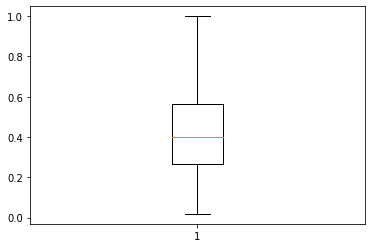

In [39]:
plt.boxplot(box_lc.ratio[box_lc.ratio <=1])
plt.show()

## Tomar dos puntos: mutaciones en LCRs y mutaciones no-LCRs.  
Luego hacer el cociente de los ratios

In [134]:
mutation_has_lc[mutation_has_lc.id_protein == 1]

,start,end,id_lc,length,id_protein,id_mutation
0,17,104,15785,88,1,35995
131,17,104,15785,88,1,1555264
21,17,104,15785,88,1,36020
72,17,104,15785,88,1,217977
140,17,104,15785,88,1,1555274
...,...,...,...,...,...,...
157,450,507,15788,58,1,1555306
63,450,507,15788,58,1,168360
93,450,507,15788,58,1,543681
85,450,507,15788,58,1,543673


In [140]:
lc_len

,id_lc,length
47295,1,8
59073,2,13
67054,3,15
90046,4,11
56934,5,17
...,...,...
128771,18206,38
75805,18209,12
75798,18210,11
75801,18211,11


In [155]:
lc_prot = mutation_has_lc[['id_protein', 'id_lc', 'length']].drop_duplicates().sort_values('id_protein')
lc_prot

,id_protein,id_lc,length
0,1,15785,88
188,1,15787,55
193,1,15788,58
41,1,15786,156
204,2,15648,23
...,...,...,...
155009,5739,6805,12
154997,5739,6804,14
155013,5740,14497,11
155022,5740,14496,15


In [160]:
# 1ro: sumar todos los dominios LCR en una proteina
lc_prot = lc_prot.groupby("id_protein")["length"].sum().to_frame().reset_index()
lc_prot

,id_protein,length
0,1,357
1,2,36
2,3,239
3,4,106
4,5,387
...,...,...
4098,5735,34
4099,5737,90
4100,5738,15
4101,5739,90


In [159]:
# 2do: sumar todas las mutaciones LCR en una proteina
mutation_has_lc.groupby("id_protein")[["id_mutation"]].count().reset_index()

,id_protein,id_mutation
0,1,203
1,2,22
2,3,14
3,4,47
4,5,200
...,...,...
4098,5735,13
4099,5737,37
4100,5738,3
4101,5739,17


In [149]:
mutation_has_lc.groupby("id_protein")[["id_mutation"]].count().reset_index().rename(columns= {'id_mutation': 'no_mutations'}).merge(lc_prot, on='id_protein', how= 'left')

,id_protein,no_mutations,length
0,1,203,88
1,1,203,156
2,1,203,55
3,1,203,58
4,2,22,13
...,...,...,...
14239,5739,17,14
14240,5739,17,12
14241,5740,13,20
14242,5740,13,15


## PLDs

In [40]:
mutation_has_pfam_domain = pd.read_csv('../db_tables/mutation_has_pfam_domain_new.tsv', sep='\t')
pfam_domain = pd.read_csv('../db_tables/pfam_domain_new.tsv', sep='\t')

In [19]:
mutation_has_pfam_domain

,id_mutation,id_protein,id_pfam,start,end
0,543657,1,PF00076,287,365
1,217976,1,PF00076,287,365
2,543665,1,PF00076,287,365
3,543684,1,PF00076,287,365
4,1555283,1,PF00076,287,365
...,...,...,...,...,...
786131,1015071,5741,PF12765,1794,1835
786132,211638,5741,PF12765,1794,1835
786133,96872,5741,PF12765,1794,1835
786134,1603588,5741,PF12765,1794,1835


In [41]:
plds = mutation_has_pfam_domain[mutation_has_pfam_domain.id_pfam.str.startswith("PLD")].sort_values('id_pfam')
plds

,id_mutation,id_protein,id_pfam,start,end
529398,1658499,3536,PLD1,588,647
529378,552980,3536,PLD1,588,647
529379,581804,3536,PLD1,588,647
529380,383247,3536,PLD1,588,647
529381,383257,3536,PLD1,588,647
...,...,...,...,...,...
280689,1594266,1961,PLD99,88,147
280687,898704,1961,PLD99,88,147
280686,898728,1961,PLD99,88,147
280699,319764,1961,PLD99,88,147


In [42]:
plds.duplicated().any()

False

In [43]:
plds.groupby('id_pfam')['id_mutation'].count()

id_pfam
PLD1      49
PLD10     72
PLD100    29
PLD101    21
PLD103    23
          ..
PLD94     18
PLD95     27
PLD97     28
PLD98     34
PLD99     26
Name: id_mutation, Length: 127, dtype: int64

In [44]:
plds["length"] = plds.end - plds.start + 1
plds

,id_mutation,id_protein,id_pfam,start,end,length
529398,1658499,3536,PLD1,588,647,60
529378,552980,3536,PLD1,588,647,60
529379,581804,3536,PLD1,588,647,60
529380,383247,3536,PLD1,588,647,60
529381,383257,3536,PLD1,588,647,60
...,...,...,...,...,...,...
280689,1594266,1961,PLD99,88,147,60
280687,898704,1961,PLD99,88,147,60
280686,898728,1961,PLD99,88,147,60
280699,319764,1961,PLD99,88,147,60


In [45]:
# PLD's aminoacids
pld_aa = plds.length.sum()
# PLD's mutations
pld_mut = len(plds.id_mutation.unique())

In [46]:
pld_mut/pld_aa

0.016666666666666666

In [47]:
pld_len = plds[["id_pfam", "length"]].drop_duplicates()
pld_len

,id_pfam,length
529398,PLD1,60
621003,PLD10,60
721298,PLD100,60
665214,PLD101,60
274338,PLD103,60
...,...,...
184886,PLD94,60
7969,PLD95,60
106890,PLD97,60
602273,PLD98,60


In [48]:
plds.groupby("id_pfam")["id_mutation"].count()

id_pfam
PLD1      49
PLD10     72
PLD100    29
PLD101    21
PLD103    23
          ..
PLD94     18
PLD95     27
PLD97     28
PLD98     34
PLD99     26
Name: id_mutation, Length: 127, dtype: int64

In [49]:
# Para el boxplot
box_pld = plds.groupby("id_pfam")["id_mutation"].count().to_frame().reset_index().merge(pld_len).rename(columns= {'id_mutation': 'no_mutations'})
box_pld["ratio"] = box_pld.no_mutations/ box_pld.length
box_pld.sort_values("ratio")

,id_pfam,no_mutations,length,ratio
110,PLD82,1,60,0.016667
32,PLD13,1,60,0.016667
80,PLD53,9,60,0.150000
98,PLD71,12,60,0.200000
13,PLD112,12,60,0.200000
...,...,...,...,...
10,PLD11,62,60,1.033333
56,PLD3,68,60,1.133333
1,PLD10,72,60,1.200000
46,PLD2,74,60,1.233333


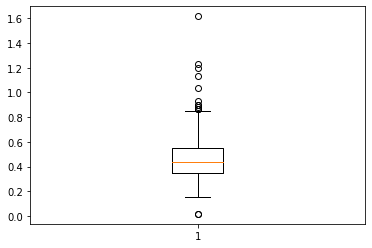

In [50]:
plt.boxplot(box_pld.ratio)
plt.show()

In [52]:
pd.DataFrame({"IDRs": box_idr.ratio, "LCRs": box_lc.ratio, "PLDs": box_pld.ratio})

AttributeError: 'DataFrame' object has no attribute 'ratio'

# Graficar: no. of mutations by aa type (disordered, lc, pld, ordered)

In [22]:
protein = pd.read_csv('../db_tables/protein.tsv', sep= '\t')

In [53]:
# COnsiderar solo 1 mut por aa
# subset de una sola mutacion por aa
mut_aa_unique = mutations[['start_aa', 'end_aa', 'id_protein']].drop_duplicates() # esto es tanto ordenados como desordenados
# eliminar mutaciones en rangos
mut_aa_unique = mut_aa_unique[mut_aa_unique.end_aa - mut_aa_unique.start_aa == 0]

# Ahora sumar todos los aa en estas proteinas
mut_aa_unique.id_protein.unique() # 5402
total_unique_aa = protein[protein.id_protein.isin(mut_aa_unique.id_protein.unique())].length.sum() # 3514830

# Sacar el nro de ordenados : restar todos los desordenados
ord_unique_aa = total_unique_aa - dis_aa - lc_aa - pld_aa

In [54]:
print(f'Total no. of aa: {total_unique_aa} \nIDRs aa: {dis_aa} \nLow-complexity aa: {lc_aa} \nPLDs aa: {pld_aa} \nOrdered aa: {ord_unique_aa}')

Total no. of aa: 3622446 
IDRs aa: 574352 
Low-complexity aa: 349061 
PLDs aa: 220020 
Ordered aa: 2479013


In [55]:
# Calcular mutaciones solo en aa ordenados
ord_mut = len(mut_aa_unique) - pld_mut - lc_mut - dis_aa
ord_mut

500628

In [56]:
ordered = ord_mut/ord_unique_aa
disordered = mut_idr/dis_aa
prions = pld_mut/pld_aa
low = lc_mut/lc_aa

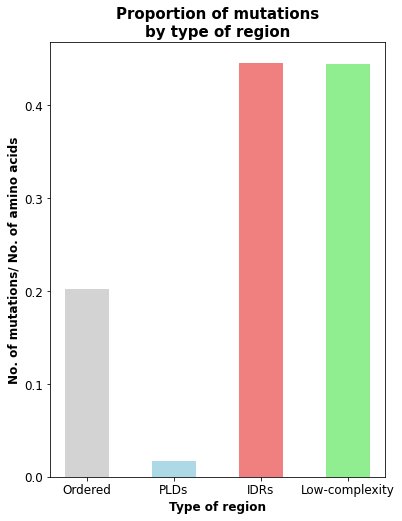

In [81]:
# Plot
fig, ax = plt.subplots(figsize=(6,8))
ax.bar(
    ["Ordered", "PLDs", "IDRs", "Low-complexity"] ,
    [ordered, prions, disordered, low],
    color=["lightgray", "lightblue", "lightcoral", "lightgreen"],
    width= 0.5
)
ax.set_ylabel("No. of mutations/ No. of amino acids", fontweight= "bold", fontdict={'fontsize': 12})
ax.set_xlabel("Type of region", fontweight= "bold", fontdict={'fontsize': 12})
ax.set_title("Proportion of mutations\nby type of region", fontweight="bold", fontdict={'fontsize': 15})
ax.tick_params(axis= 'both', labelsize= 12)

plt.show()
#fig.savefig("proportion-mutations.png", dpi= 300, bbox_inches='tight')

## Boxplot  
calcular el cociente mutation/aa para cada tipo de dominio  
tomar cada protein, ver que regiones tiene y contar el nro de mutaciones  
calcular esto para que region (cada PLD, cada IDR) y hacer el boxplot. swarm plot (con puntitos)

# Mutations Overlap

In [11]:
mutation_has_source = pd.read_csv('../db_tables/mutation_has_source_new.tsv', sep='\t')
source = pd.read_csv('../db_tables/source.tsv', sep='\t')
mutation_has_source = mutation_has_source.merge(source)

In [12]:
mutation_has_source[mutation_has_source.id_source == 1]

,id_mutation,id_insource,id_source,source
0,1,130535,1,clinvar
1,2,130536,1,clinvar
2,3,130537,1,clinvar
3,4,130538,1,clinvar
4,5,130539,1,clinvar
...,...,...,...,...
221092,221093,770727,1,clinvar
221093,221094,784497,1,clinvar
221094,221095,769896,1,clinvar
221095,221096,774959,1,clinvar


In [14]:
# Total entries in clivar: 1_646_128
221097 / 1_646_128

0.1343133705276868

In [16]:
mutation_has_source.source.value_counts()

cosmic      1464124
clinvar      221097
disgenet      56813
uniprot       22965
Name: source, dtype: int64

In [15]:
mutation_has_source[mutation_has_source.source == "cosmic"]

,id_mutation,id_insource,id_source,source
221097,7,COSV53546689,4,cosmic
221098,11,COSV53548638,4,cosmic
221099,13,COSV53548286,4,cosmic
221100,14,COSV99564853,4,cosmic
221101,16,COSV99565229,4,cosmic
...,...,...,...,...
1685216,1647028,COSV54194440,4,cosmic
1685217,1647029,COSV54195705,4,cosmic
1685218,1647030,COSV104596095,4,cosmic
1685219,1647031,COSV99658090,4,cosmic


In [6]:
mutations

,id_mutation,snp_id,chromosome,start_genomic,end_genomic,start_aa,end_aa,notation_cds,notation_aa,id_protein,id_consequence,consequence
0,1,rs184639841,16,2500291.0,2500291.0,442,442,c.1326C>T,p.Y442=,3155,2,synonym
1,2,rs12373107,16,2500405.0,2500405.0,480,480,c.1440G>A,p.S480=,3155,2,synonym
2,3,rs201059992,16,2500465.0,2500465.0,500,500,c.1500G>A,p.A500=,3155,2,synonym
3,4,rs189089167,16,2500474.0,2500474.0,503,503,c.1509C>T,p.S503=,3155,2,synonym
4,5,rs13339237,16,2496355.0,2496355.0,69,69,c.207T>C,p.P69=,3155,2,synonym
...,...,...,...,...,...,...,...,...,...,...,...,...
1660054,221093,rs377559803,6,31954664.0,31954675.0,205,206,c.610_621CGGGATCGAGAC[1],p.205_206DR[3],1542,10,repeted
1660055,221094,rs139983860,6,31954569.0,31954574.0,237,238,c.717_722CCGAGA[1],p.237_238DR[2],1542,10,repeted
1660056,221095,rs71156436,16,24777102.0,24777113.0,113,114,c.339_350del,p.113_114PQ[1],114,10,repeted
1660057,221096,rs548858570,19,47071967.0,47071978.0,645,648,c.1934_1945ACGCAGACATGC[1],p.645_648HADM[1],5660,10,repeted


In [17]:
from matplotlib_venn import venn3

In [ ]:
A = set(mutation_has_source[mutation_has_source.source == "cosmic"])
B = set(dfB.BNames)
C = set(dfC.CNames)

AB_overlap = A & B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C

A_rest = A - AB_overlap - AC_overlap
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap

AB_only = AB_overlap - ABC_overlap
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

In [21]:
(mutation_has_source.source == "cosmic") & (mutation_has_source.source == "clinvar")

0          False
1          False
2          False
3          False
4          False
           ...  
1764994    False
1764995    False
1764996    False
1764997    False
1764998    False
Name: source, Length: 1764999, dtype: bool

# Mutaciones por proteina por roles

# Diseases

In [3]:
disease = pd.read_csv('../db_tables/disease.tsv', sep= '\t')

In [4]:
len(disease.disease_name.unique())

4051

In [5]:
terms = " ".join(n for n in disease['disease_name'])

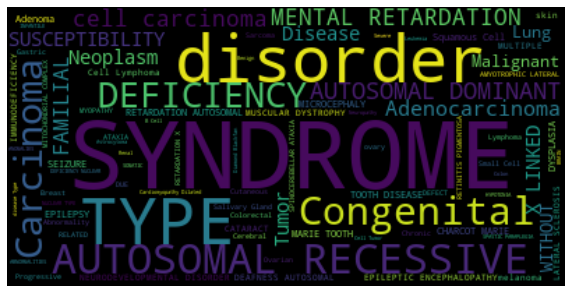

In [9]:
from wordcloud import WordCloud
plt.figure(figsize=(10, 10))
wc = WordCloud().generate(terms)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
wc.to_file("disease_wc.png")

# QR code for DisPhaseDB web

In [196]:
import qrcode
qr = qrcode.QRCode(
    version= 1,
    error_correction = qrcode.constants.ERROR_CORRECT_H,
    box_size= 15,
    border= 2
)
qr.add_data("http://disphasedb.leloir.org.ar/")
qr.make(fit= True)

img = qr.make_image(fill_color= 'black', back_color= 'white')
img.save("qr-disphase.png")

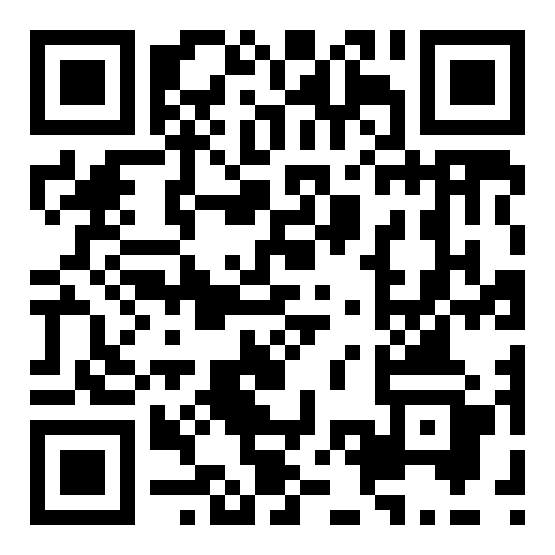

In [195]:
img